# Multivariate Visual Analysis of Counties
In this notebook, we explore the correlations of the economic and well data for the whole of Kansas and dive deeper into each of the counties we have selected in previous notebooks based on well activity and variance over time in their well activity.

In [1]:
#loading libraries and economic data

install.packages("ggplot2")
install.packages("plotly")
install.packages("ggcorrplot")


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
remove.packages("rlang")

Removing package from ‘/opt/conda/lib/R/library’
(as ‘lib’ is unspecified)
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
install.packages("https://cran.r-project.org/src/contrib/Archive/rlang/rlang_0.4.10.tar.gz", repo=NULL, type="source")

In [4]:
df <- read.csv('../../casestudy_data/group_2/well_activity_and_economic_data.csv')
head(df)
summary(df)
str(df)

COUNTY,YEAR,MONTH,PERMIT_COUNT,SPUD_COUNT,COMPLETION_COUNT,PLUGGING_COUNT,OIL_PRODUCTION,OIL_WELLS,GAS_PRODUCTION,GAS_WELLS,DATE,Time,Labor_Force,Employed,Unemployed,Unemployment
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Allen,1990,1,7,8,8,32,46552,1420,5196,11,1990-01-01,1990-01-01,6860,6391,469,6.8
Allen,1990,2,7,6,7,25,38095,1420,5465,11,1990-02-01,1990-02-01,6750,6351,399,5.9
Allen,1990,3,7,4,6,10,42347,1420,4944,11,1990-03-01,1990-03-01,6875,6422,453,6.6
Allen,1990,4,14,11,9,9,42569,1420,6243,11,1990-04-01,1990-04-01,7085,6713,372,5.3
Allen,1990,5,6,13,13,14,42596,1420,5955,11,1990-05-01,1990-05-01,7044,6712,332,4.7
Allen,1990,6,3,4,5,6,40655,1420,4922,11,1990-06-01,1990-06-01,7141,6738,403,5.6


      COUNTY           YEAR          MONTH         PERMIT_COUNT    
 Ellis   :  351   Min.   :1990   Min.   : 1.000   Min.   :  1.000  
 Ness    :  349   1st Qu.:1997   1st Qu.: 4.000   1st Qu.:  1.000  
 Stafford:  343   Median :2005   Median : 7.000   Median :  3.000  
 Barton  :  341   Mean   :2005   Mean   : 6.555   Mean   :  4.504  
 Barber  :  335   3rd Qu.:2012   3rd Qu.:10.000   3rd Qu.:  5.000  
 Haskell :  326   Max.   :2021   Max.   :12.000   Max.   :145.000  
 (Other) :16027                                                    
   SPUD_COUNT      COMPLETION_COUNT  PLUGGING_COUNT    OIL_PRODUCTION  
 Min.   :  0.000   Min.   :  0.000   Min.   :  0.000   Min.   :    39  
 1st Qu.:  1.000   1st Qu.:  1.000   1st Qu.:  1.000   1st Qu.: 15330  
 Median :  3.000   Median :  3.000   Median :  2.000   Median : 32631  
 Mean   :  4.462   Mean   :  4.268   Mean   :  3.509   Mean   : 54747  
 3rd Qu.:  6.000   3rd Qu.:  6.000   3rd Qu.:  4.000   3rd Qu.: 66778  
 Max.   :102.000   Max. 

'data.frame':	18072 obs. of  17 variables:
 $ COUNTY          : Factor w/ 100 levels "Allen","Anderson",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ YEAR            : int  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ MONTH           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ PERMIT_COUNT    : int  7 7 7 14 6 3 5 17 15 19 ...
 $ SPUD_COUNT      : int  8 6 4 11 13 4 6 14 10 19 ...
 $ COMPLETION_COUNT: int  8 7 6 9 13 5 5 12 18 11 ...
 $ PLUGGING_COUNT  : int  32 25 10 9 14 6 28 8 29 17 ...
 $ OIL_PRODUCTION  : num  46552 38095 42347 42569 42596 ...
 $ OIL_WELLS       : num  1420 1420 1420 1420 1420 1420 1420 1420 1420 1420 ...
 $ GAS_PRODUCTION  : num  5196 5465 4944 6243 5955 ...
 $ GAS_WELLS       : num  11 11 11 11 11 11 11 11 11 11 ...
 $ DATE            : Factor w/ 378 levels "","1990-01-01",..: 2 3 4 5 6 7 8 9 10 11 ...
 $ Time            : Factor w/ 377 levels "","1990-01-01",..: 2 3 4 5 6 7 8 9 10 11 ...
 $ Labor_Force     : num  6860 6750 6875 7085 7044 ...
 $ Employed        : num  6391 

In [5]:
install.packages("psych")
library(psych)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [6]:
describeBy(df, df$COUNTY)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[


 Descriptive statistics by group 
group: Allen
                 vars   n     mean       sd  median  trimmed      mad     min
COUNTY*             1 319     1.00     0.00     1.0     1.00     0.00     1.0
YEAR                2 319  2005.07     8.88  2006.0  2005.11    10.38  1990.0
MONTH               3 319     6.62     3.43     7.0     6.63     4.45     1.0
PERMIT_COUNT        4 319     8.45     8.23     6.0     7.02     4.45     1.0
SPUD_COUNT          5 319     7.99     7.39     6.0     6.80     5.93     0.0
COMPLETION_COUNT    6 319     7.77     7.53     5.0     6.51     4.45     0.0
PLUGGING_COUNT      7 319    12.23    12.20     9.0    10.36     8.90     0.0
OIL_PRODUCTION      8 316 25222.11  8544.90 22133.0 24011.02  6243.23 12121.0
OIL_WELLS           9 316  1982.48   382.30  2017.0  1998.02   327.65  1255.0
GAS_PRODUCTION     10 316 18800.29 14447.74 15488.5 16790.72 13020.93   591.0
GAS_WELLS          11 316    96.11    68.95    83.0    92.17    87.47     8.0
DATE*           

In [7]:
#corrleation matrix between possible pairs of variables exlucing County, Year, Month, Date and Time columns
dfcor <-df[-c(1:3,12:13)]
cors <- cor(dfcor[sapply(dfcor, is.numeric)], use='pairwise')
cors

,PERMIT_COUNT,SPUD_COUNT,COMPLETION_COUNT,PLUGGING_COUNT,OIL_PRODUCTION,OIL_WELLS,GAS_PRODUCTION,GAS_WELLS,Labor_Force,Employed,Unemployed,Unemployment
PERMIT_COUNT,1.00000000,0.75372497,0.66606438,0.228534336,0.08179783,0.278236759,0.04149056,0.08650058,0.052962832,0.052579529,0.058463202,0.17598593
SPUD_COUNT,0.75372497,1.00000000,0.87141538,0.274734049,0.15600418,0.302687930,0.09598053,0.15948932,0.038702981,0.038336465,0.044591121,0.15423947
COMPLETION_COUNT,0.66606438,0.87141538,1.00000000,0.294097045,0.17181217,0.307529899,0.11023587,0.17705431,0.032557966,0.032188461,0.038834323,0.14640475
PLUGGING_COUNT,0.22853434,0.27473405,0.29409705,1.000000000,0.16510278,0.405007270,-0.10731528,-0.05972321,-0.008474923,-0.008698399,-0.003196039,0.16661653
OIL_PRODUCTION,0.08179783,0.15600418,0.17181217,0.165102781,1.00000000,0.478198234,0.20043975,0.17278276,-0.062658989,-0.061562486,-0.083087704,-0.19860593
OIL_WELLS,0.27823676,0.30268793,0.30752990,0.405007270,0.47819823,1.000000000,-0.23798531,-0.20239149,0.009239658,0.009128449,0.011159557,0.27857703
GAS_PRODUCTION,0.04149056,0.09598053,0.11023587,-0.107315282,0.20043975,-0.237985310,1.00000000,0.73468305,-0.091766523,-0.091247153,-0.098183652,-0.22309913
GAS_WELLS,0.08650058,0.15948932,0.17705431,-0.059723207,0.17278276,-0.202391494,0.73468305,1.00000000,-0.120069390,-0.119930252,-0.116729318,-0.08355133
Labor_Force,0.05296283,0.03870298,0.03255797,-0.008474923,-0.06265899,0.009239658,-0.09176652,-0.12006939,1.000000000,0.999894976,0.949619620,0.07009546
Employed,0.05257953,0.03833647,0.03218846,-0.008698399,-0.06156249,0.009128449,-0.09124715,-0.11993025,0.999894976,1.000000000,0.944977812,0.06544609


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
corrplot 0.90 loaded


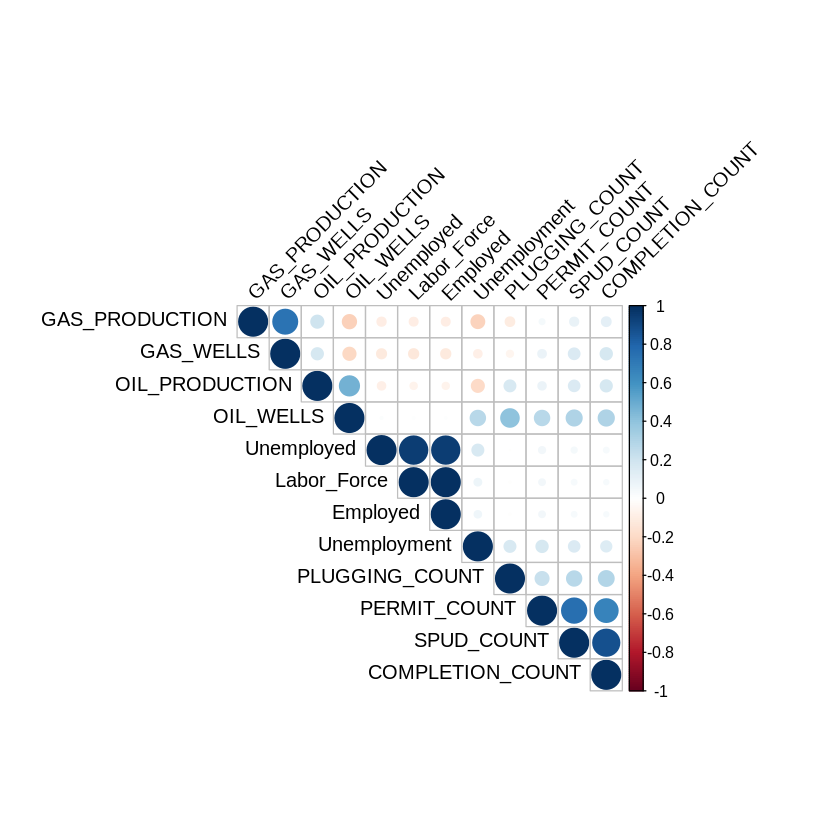

In [8]:
install.packages("corrplot")
library(corrplot)
corrplot(cors, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

In [9]:
#converting DATE column to date so we can remove anything before March 2020
df$DATE <- as.Date(df$DATE)
class(df$DATE)

[1] "Date"

In [10]:
#what if we shaved some time off our initial dataset to eliminate covid employment data
dfprecovid <- subset(df, DATE < as.Date("2020-03-01") )
dfprecovid[order(dfprecovid$DATE, decreasing = TRUE),]

,COUNTY,YEAR,MONTH,PERMIT_COUNT,SPUD_COUNT,COMPLETION_COUNT,PLUGGING_COUNT,OIL_PRODUCTION,OIL_WELLS,GAS_PRODUCTION,GAS_WELLS,DATE,Time,Labor_Force,Employed,Unemployed,Unemployment
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
311,Allen,2020,2,1,4,0,1,18080,2238,13092,83,2020-02-01,2020-02-01,6428,6202,226,3.5
565,Anderson,2020,2,2,0,0,0,9774,1881,NA,NA,2020-02-01,2020-02-01,4195,4054,141,3.4
906,Barber,2020,2,1,0,1,8,53431,1302,901209,1362,2020-02-01,2020-02-01,2316,2255,61,2.6
2399,Cheyenne,2020,2,7,6,2,11,24557,105,116544,539,2020-02-01,2020-02-01,1303,1271,32,2.5
2645,Clark,2020,2,2,1,0,0,11588,97,87720,150,2020-02-01,2020-02-01,1106,1083,23,2.1
2903,Coffey,2020,2,13,11,10,8,17677,1513,NA,NA,2020-02-01,2020-02-01,3941,3752,189,4.8
3453,Cowley,2020,2,2,1,5,0,42546,684,214,1,2020-02-01,2020-02-01,16770,16200,570,3.4
5515,Franklin,2020,2,8,0,0,1,9139,2056,NA,NA,2020-02-01,2020-02-01,14275,13766,509,3.6
6118,Graham,2020,2,2,4,5,5,70312,916,NA,NA,2020-02-01,2020-02-01,1179,1151,28,2.4


In [11]:
dfprecovidcor <-dfprecovid[-c(1:3,12:13)]
precovidcors <- cor(dfprecovidcor[sapply(dfprecovidcor, is.numeric)], use='pairwise')
precovidcors

,PERMIT_COUNT,SPUD_COUNT,COMPLETION_COUNT,PLUGGING_COUNT,OIL_PRODUCTION,OIL_WELLS,GAS_PRODUCTION,GAS_WELLS,Labor_Force,Employed,Unemployed,Unemployment
PERMIT_COUNT,1.00000000,0.75421161,0.66582382,0.226975224,0.08138595,0.279990772,0.03997448,0.08602331,0.052929379,0.052520940,0.059014020,0.17747319
SPUD_COUNT,0.75421161,1.00000000,0.87055782,0.274620765,0.15499526,0.305097640,0.09415508,0.15913867,0.038264620,0.037872304,0.044771016,0.15554922
COMPLETION_COUNT,0.66582382,0.87055782,1.00000000,0.294118300,0.17096372,0.309963706,0.10843486,0.17664387,0.032140046,0.031743070,0.039070047,0.14800629
PLUGGING_COUNT,0.22697522,0.27462077,0.29411830,1.000000000,0.16559576,0.406509698,-0.10808346,-0.06051160,-0.008772127,-0.009010614,-0.003130712,0.16806859
OIL_PRODUCTION,0.08138595,0.15499526,0.17096372,0.165595761,1.00000000,0.479573866,0.20016336,0.17315829,-0.063046072,-0.061952977,-0.083479636,-0.19966449
OIL_WELLS,0.27999077,0.30509764,0.30996371,0.406509698,0.47957387,1.000000000,-0.23921712,-0.20358042,0.009288683,0.009178006,0.011204892,0.27933406
GAS_PRODUCTION,0.03997448,0.09415508,0.10843486,-0.108083463,0.20016336,-0.239217120,1.00000000,0.73568657,-0.092279569,-0.091755595,-0.098822163,-0.22428900
GAS_WELLS,0.08602331,0.15913867,0.17664387,-0.060511596,0.17315829,-0.203580418,0.73568657,1.00000000,-0.120353839,-0.120213984,-0.117037647,-0.08432475
Labor_Force,0.05292938,0.03826462,0.03214005,-0.008772127,-0.06304607,0.009288683,-0.09227957,-0.12035384,1.000000000,0.999895885,0.949621775,0.06832750
Employed,0.05252094,0.03787230,0.03174307,-0.009010614,-0.06195298,0.009178006,-0.09175560,-0.12021398,0.999895885,1.000000000,0.945000625,0.06370394


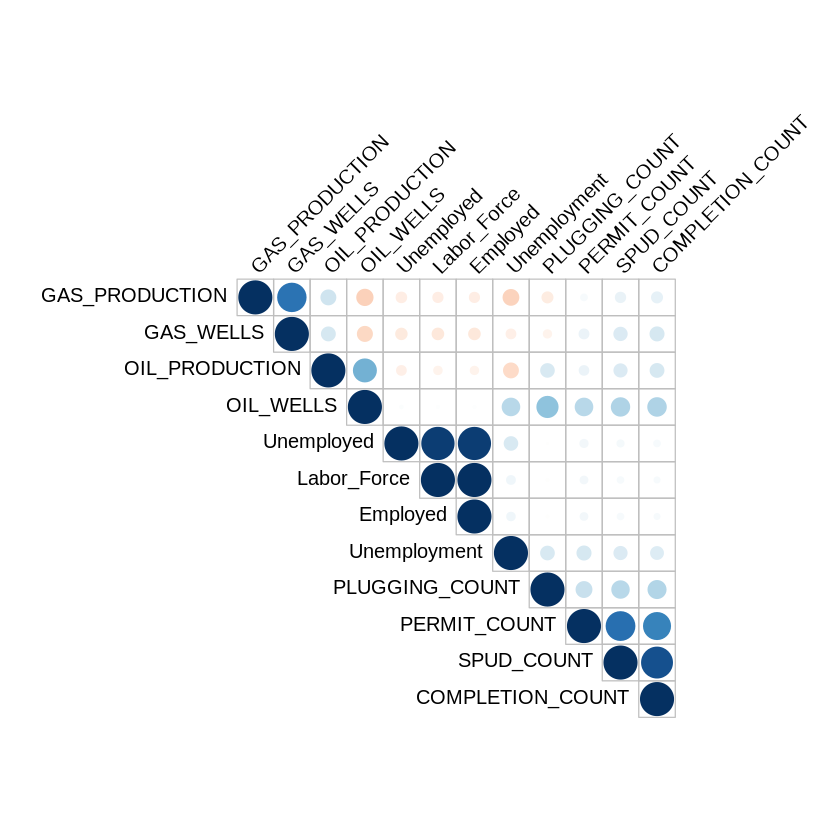

In [12]:
corrplot(precovidcors, type = "upper", order = 'hclust', 
         cl.pos = 'n', 
         tl.col = "black", tl.srt = 45)

Removing Pandemic months changed our state-wide coorelations slightly but not by much.

Let's do some county-level exploration based on a list of counties selected becuse of their well activity or variance over time in well activity: Miami, Montgomery, Allen, Ellis, Woodson, Anderson, Wilson, Neosho, and Franklin

We'll start with corrlation matrices of subsetted data, removing the time columns. Then, we'll visuale some well activity along with economic indicators to get a sense for any patterns at the county level.

In [13]:
miami <- df[which(df$COUNTY=="Miami"),]
miamicor <-miami[-c(1:3,12:13)]
miamires <- cor(miamicor[sapply(miamicor, is.numeric)], use='pairwise')
miamires

,PERMIT_COUNT,SPUD_COUNT,COMPLETION_COUNT,PLUGGING_COUNT,OIL_PRODUCTION,OIL_WELLS,GAS_PRODUCTION,GAS_WELLS,Labor_Force,Employed,Unemployed,Unemployment
PERMIT_COUNT,1.000000000,0.795118334,0.69518574,0.086113047,0.25553654,0.24762033,-0.07188279,0.05374261,0.269278923,0.270474167,0.08979453,-0.002188302
SPUD_COUNT,0.795118334,1.000000000,0.91720874,0.165812668,0.28509048,0.25023252,0.04024194,0.14451665,0.270401708,0.270696510,0.09641378,0.003117382
COMPLETION_COUNT,0.695185738,0.917208738,1.00000000,0.178642195,0.26388547,0.26897645,0.08896530,0.16773028,0.296375222,0.295746176,0.11224204,0.011807722
PLUGGING_COUNT,0.086113047,0.165812668,0.17864219,1.000000000,-0.01598474,-0.03984631,-0.01260953,-0.25034698,-0.006536259,0.007595686,-0.09984950,-0.113617135
OIL_PRODUCTION,0.255536537,0.285090485,0.26388547,-0.015984735,1.00000000,-0.27388546,-0.57912185,-0.39005492,-0.214949866,-0.188242957,-0.26259478,-0.166936030
OIL_WELLS,0.247620332,0.250232523,0.26897645,-0.039846308,-0.27388546,1.00000000,0.23619492,0.27565661,0.876149049,0.885994373,0.25486661,-0.067704830
GAS_PRODUCTION,-0.071882787,0.040241941,0.08896530,-0.012609529,-0.57912185,0.23619492,1.00000000,0.69058218,0.304291681,0.267898373,0.25600262,0.212784406
GAS_WELLS,0.053742610,0.144516647,0.16773028,-0.250346982,-0.39005492,0.27565661,0.69058218,1.00000000,0.397899259,0.285413501,0.61717124,0.567194985
Labor_Force,0.269278923,0.270401708,0.29637522,-0.006536259,-0.21494987,0.87614905,0.30429168,0.39789926,1.000000000,0.991339625,0.42380878,0.081430508
Employed,0.270474167,0.270696510,0.29574618,0.007595686,-0.18824296,0.88599437,0.26789837,0.28541350,0.991339625,1.000000000,0.30119235,-0.049302044


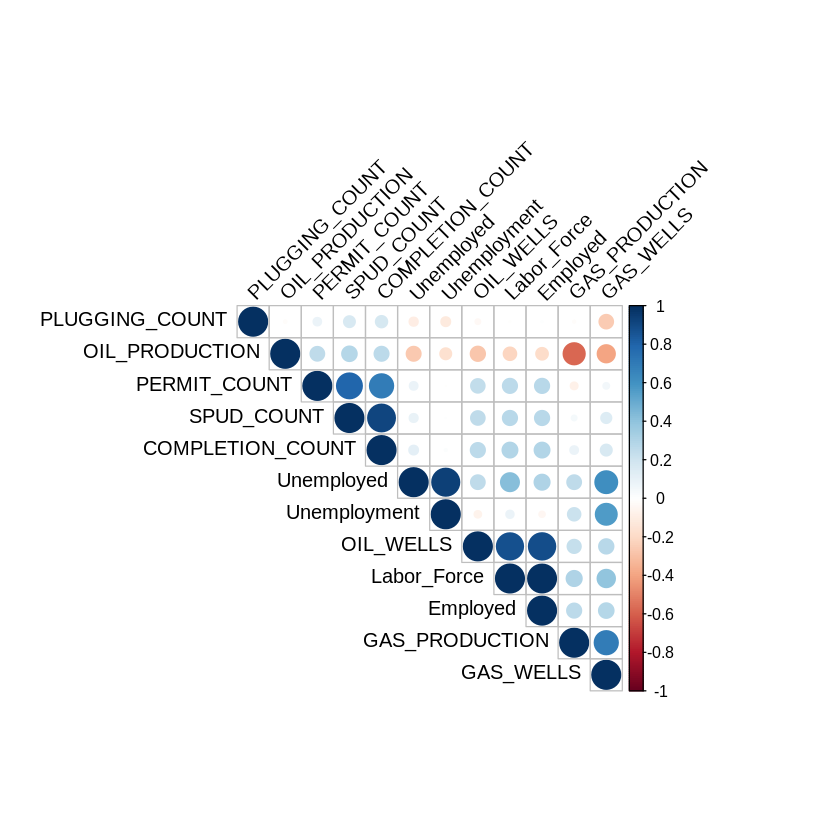

In [14]:
corrplot(miamires, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)


Attaching package: ‘ggplot2’

The following objects are masked from ‘package:psych’:

    %+%, alpha

Warning message:
“Removed 138 rows containing missing values (geom_point).”

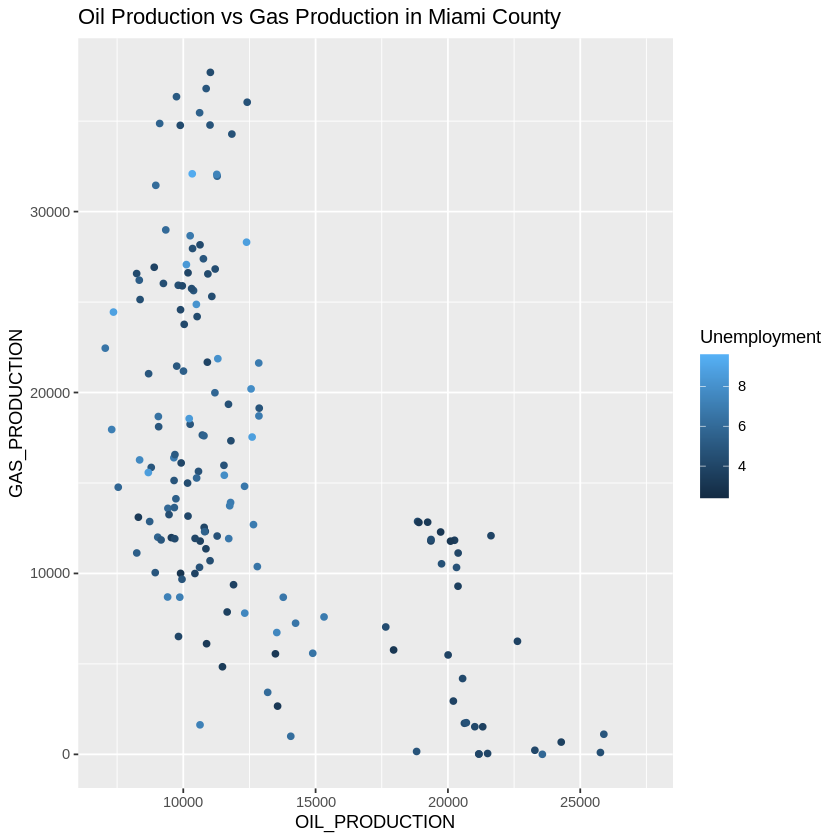

In [15]:
library(ggplot2)

ggplot(data=miami,aes(x=OIL_PRODUCTION,y=GAS_PRODUCTION)) + geom_point(aes(color=Unemployment)) +
   labs(title="Oil Production vs Gas Production in Miami County",x="OIL_PRODUCTION", y="GAS_PRODUCTION")


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



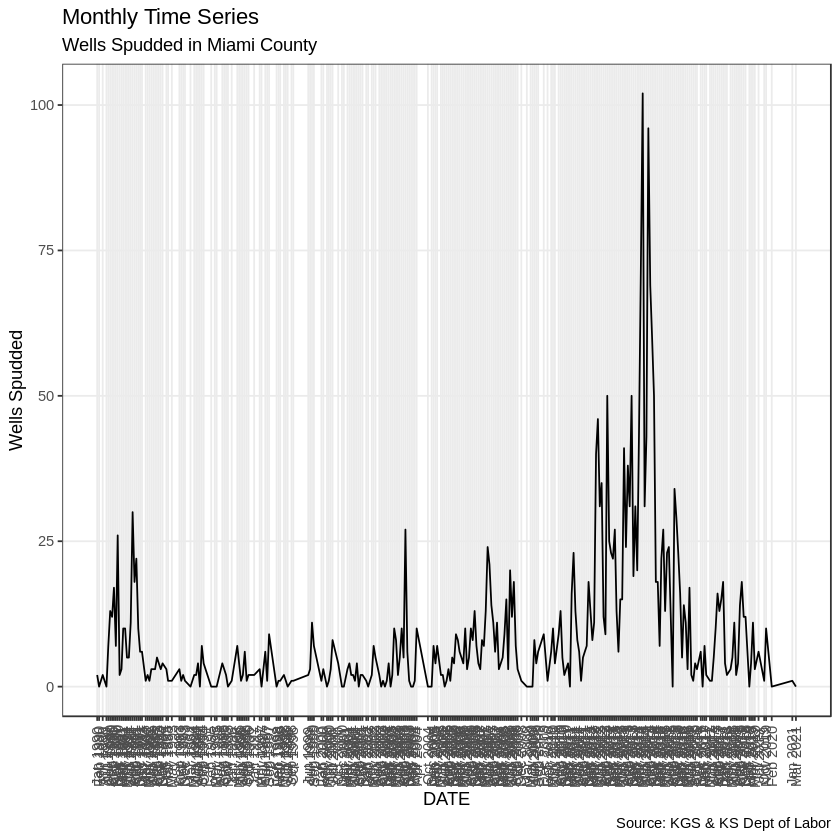

In [16]:
library(lubridate)
theme_set(theme_bw())

# labels and breaks for X axis text
lbls <- paste0(month.abb[month(miami$DATE)], " ", lubridate::year(miami$DATE))
brks <- miami$DATE

# plot
ggplot(miami, aes(x=DATE)) + 
  geom_line(aes(y=SPUD_COUNT)) + 
  labs(title="Monthly Time Series", 
       subtitle="Wells Spudded in Miami County", 
       caption="Source: KGS & KS Dept of Labor", 
       y="Wells Spudded") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”

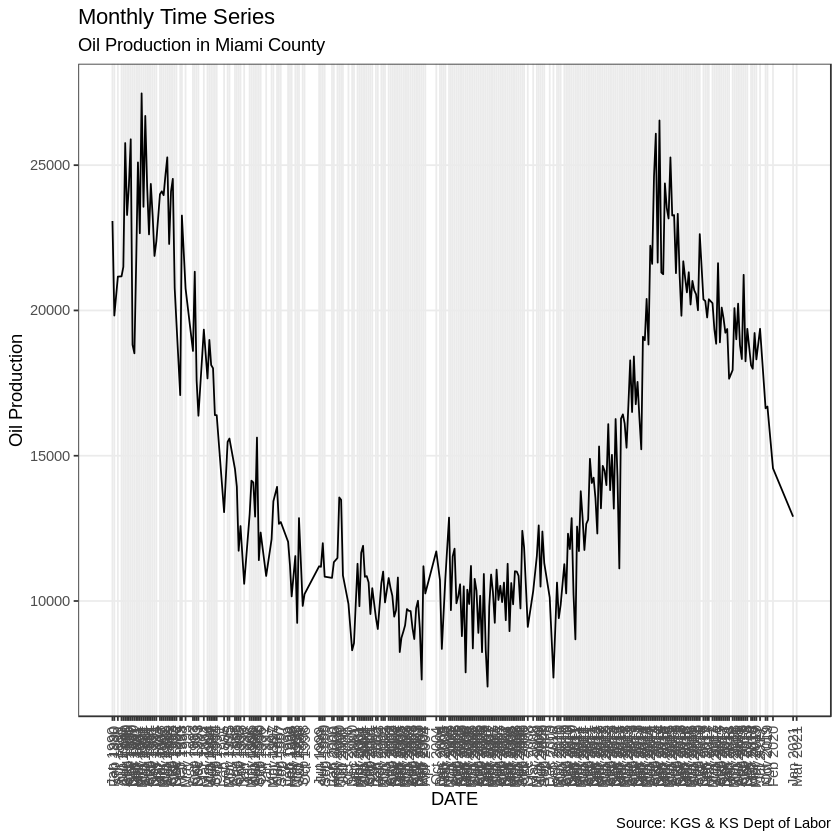

In [17]:
library(lubridate)
theme_set(theme_bw())

# labels and breaks for X axis text
lbls <- paste0(month.abb[month(miami$DATE)], " ", lubridate::year(miami$DATE))
brks <- miami$DATE

# plot
ggplot(miami, aes(x=DATE)) + 
  geom_line(aes(y=OIL_PRODUCTION)) + 
  labs(title="Monthly Time Series", 
       subtitle="Oil Production in Miami County", 
       caption="Source: KGS & KS Dept of Labor", 
       y="Oil Production") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())

Warning message:
“Removed 20 row(s) containing missing values (geom_path).”

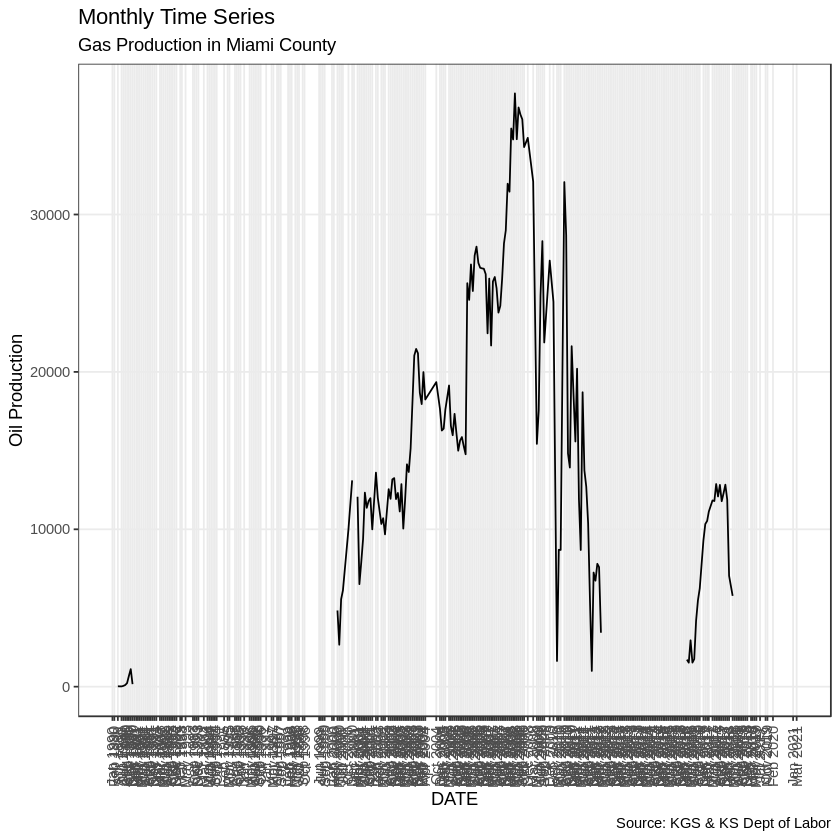

In [18]:
library(lubridate)
theme_set(theme_bw())

# labels and breaks for X axis text
lbls <- paste0(month.abb[month(miami$DATE)], " ", lubridate::year(miami$DATE))
brks <- miami$DATE

# plot
ggplot(miami, aes(x=DATE)) + 
  geom_line(aes(y=GAS_PRODUCTION)) + 
  labs(title="Monthly Time Series", 
       subtitle="Gas Production in Miami County", 
       caption="Source: KGS & KS Dept of Labor", 
       y="Oil Production") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())

In [19]:
montgomery <- df[which(df$COUNTY=="Montgomery"),]
montgomerycor <-montgomery[-c(1:3,12:13)]
montgomeryres <- cor(montgomerycor[sapply(montgomerycor, is.numeric)], use='pairwise')
montgomeryres

,PERMIT_COUNT,SPUD_COUNT,COMPLETION_COUNT,PLUGGING_COUNT,OIL_PRODUCTION,OIL_WELLS,GAS_PRODUCTION,GAS_WELLS,Labor_Force,Employed,Unemployed,Unemployment
PERMIT_COUNT,1.00000000,0.78757347,0.66875270,0.03919996,0.042096765,-0.25102943,0.17633648,0.144780590,0.06521937,0.112943115,-0.09045119,-0.103700873
SPUD_COUNT,0.78757347,1.00000000,0.82052070,0.02946350,0.040577951,-0.25018355,0.26027468,0.208033086,0.12919320,0.168811505,-0.04510548,-0.066191400
COMPLETION_COUNT,0.66875270,0.82052070,1.00000000,0.05207802,-0.024160312,-0.29706520,0.36349089,0.303412922,0.15530935,0.190569818,-0.02403316,-0.047025311
PLUGGING_COUNT,0.03919996,0.02946350,0.05207802,1.00000000,0.073011286,0.03297501,-0.05033689,-0.069938459,0.08280447,0.067735138,0.06986952,0.064322528
OIL_PRODUCTION,0.04209677,0.04057795,-0.02416031,0.07301129,1.000000000,0.44936374,-0.39398308,-0.492466441,0.38357514,0.418563874,0.06351435,0.007313277
OIL_WELLS,-0.25102943,-0.25018355,-0.29706520,0.03297501,0.449363740,1.00000000,-0.17425619,-0.143265010,0.26322142,0.272137274,0.07973916,0.036990275
GAS_PRODUCTION,0.17633648,0.26027468,0.36349089,-0.05033689,-0.393983076,-0.17425619,1.00000000,0.955531311,0.29472451,0.152201193,0.45455734,0.426208513
GAS_WELLS,0.14478059,0.20803309,0.30341292,-0.06993846,-0.492466441,-0.14326501,0.95553131,1.000000000,0.09976803,-0.006139933,0.29198240,0.281416284
Labor_Force,0.06521937,0.12919320,0.15530935,0.08280447,0.383575137,0.26322142,0.29472451,0.099768029,1.00000000,0.939410578,0.54742409,0.419894229
Employed,0.11294312,0.16881151,0.19056982,0.06773514,0.418563874,0.27213727,0.15220119,-0.006139933,0.93941058,1.000000000,0.22738695,0.083923975


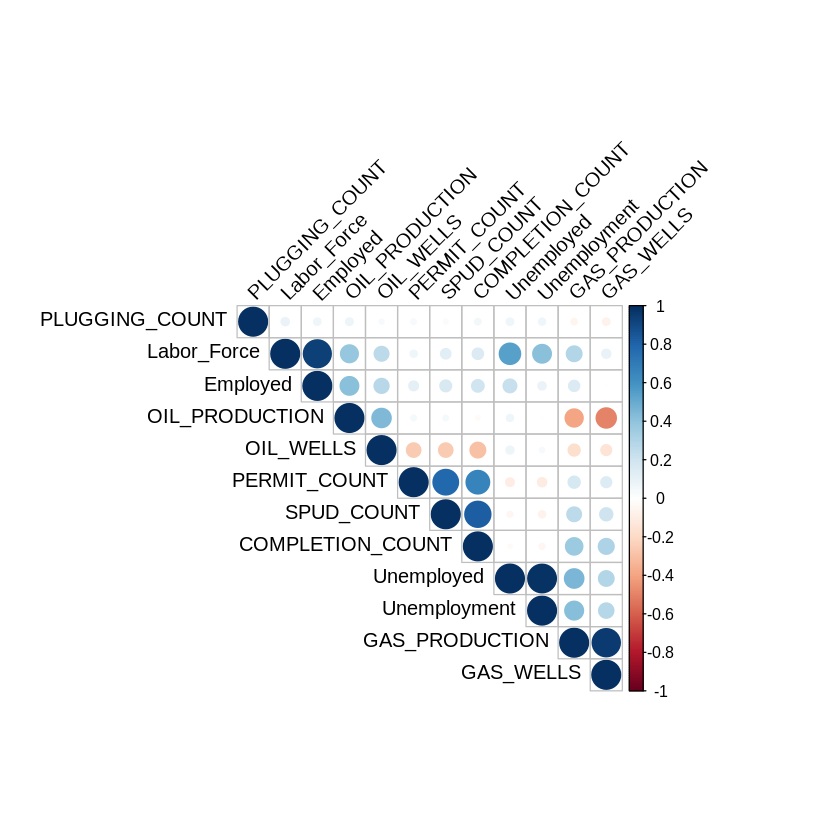

In [20]:
corrplot(montgomeryres, type = "upper", order = "hclust", tl.col = "black", tl.srt = 45)

Warning message:
“Removed 3 rows containing missing values (geom_point).”

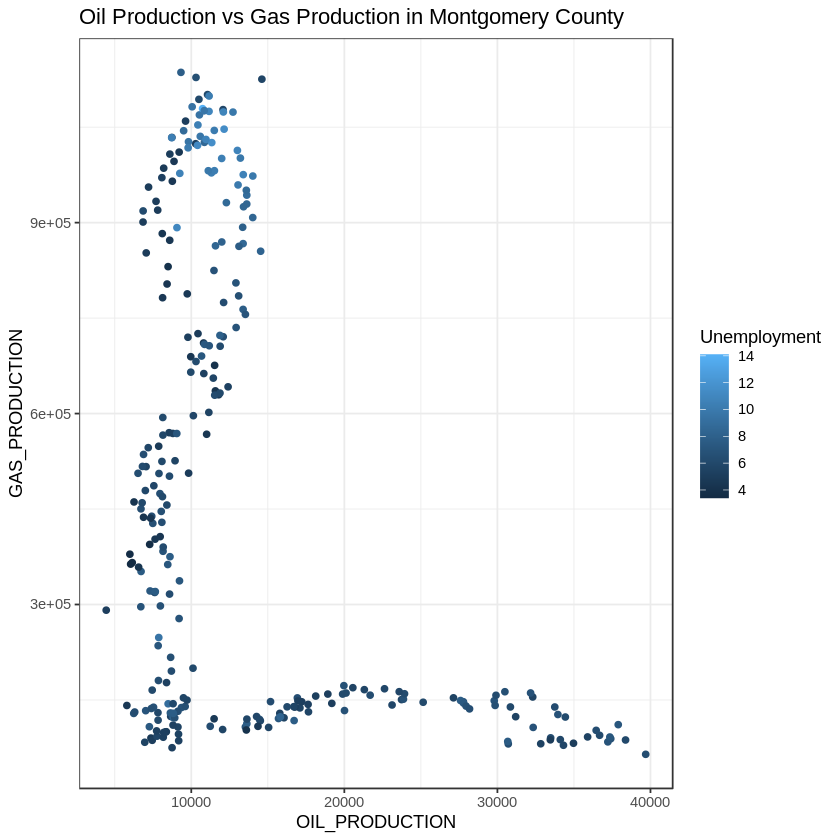

In [21]:
ggplot(data=montgomery,aes(x=OIL_PRODUCTION,y=GAS_PRODUCTION)) + geom_point(aes(color=Unemployment)) +
   labs(title="Oil Production vs Gas Production in Montgomery County",x="OIL_PRODUCTION", y="GAS_PRODUCTION")

Warning message:
“Removed 3 row(s) containing missing values (geom_path).”

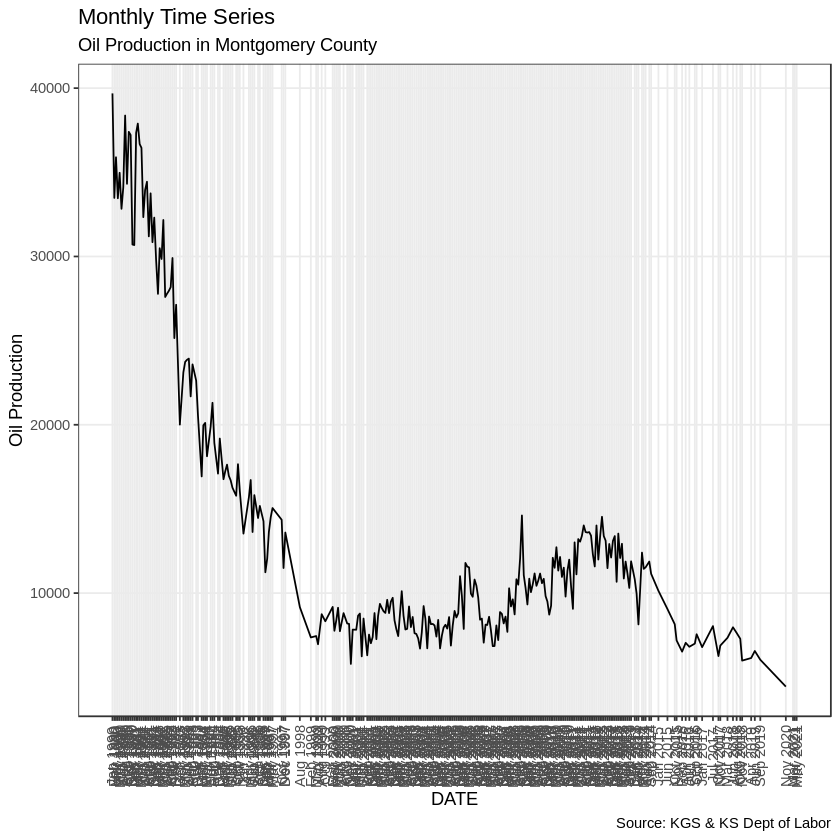

In [22]:
# labels and breaks for X axis text
lbls <- paste0(month.abb[month(montgomery$DATE)], " ", lubridate::year(montgomery$DATE))
brks <- montgomery$DATE

# plot
ggplot(montgomery, aes(x=DATE)) + 
  geom_line(aes(y=OIL_PRODUCTION)) + 
  labs(title="Monthly Time Series", 
       subtitle="Oil Production in Montgomery County", 
       caption="Source: KGS & KS Dept of Labor", 
       y="Oil Production") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())

Warning message:
“Removed 3 row(s) containing missing values (geom_path).”

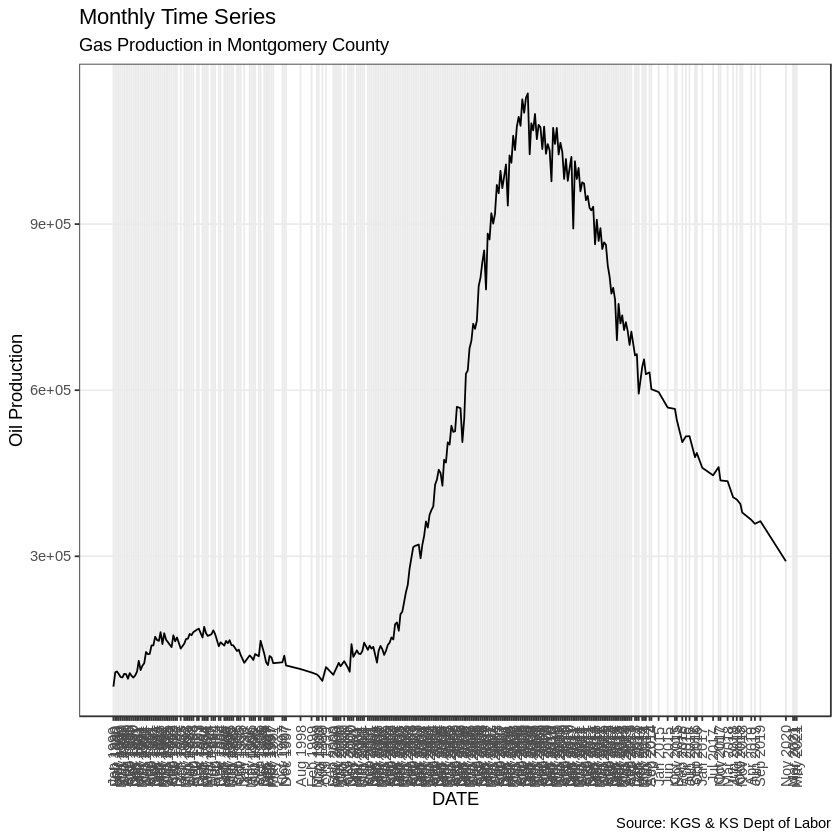

In [23]:
# plot
ggplot(montgomery, aes(x=DATE)) + 
  geom_line(aes(y=GAS_PRODUCTION)) + 
  labs(title="Monthly Time Series", 
       subtitle="Gas Production in Montgomery County", 
       caption="Source: KGS & KS Dept of Labor", 
       y="Oil Production") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())

In [24]:
allen <- df[which(df$COUNTY=="Allen"),]
allencor <-allen[-c(1:3,12:13)]
allenres <- cor(allencor[sapply(allencor, is.numeric)], use='pairwise')
allenres

,PERMIT_COUNT,SPUD_COUNT,COMPLETION_COUNT,PLUGGING_COUNT,OIL_PRODUCTION,OIL_WELLS,GAS_PRODUCTION,GAS_WELLS,Labor_Force,Employed,Unemployed,Unemployment
PERMIT_COUNT,1.00000000,0.649108415,0.576230503,0.001168380,0.039084215,0.08024072,0.07279827,0.2676270,0.03319493,0.01278702,0.076178896,0.08086382
SPUD_COUNT,0.64910842,1.000000000,0.814157190,-0.001685166,0.079768356,0.07701050,0.06579528,0.3022343,0.06295381,0.03431639,0.110016367,0.11328604
COMPLETION_COUNT,0.57623050,0.814157190,1.000000000,0.009508171,0.092523379,0.06657334,0.07618287,0.3208576,0.06217520,0.03357719,0.109733202,0.11279878
PLUGGING_COUNT,0.00116838,-0.001685166,0.009508171,1.000000000,0.062185676,-0.05534895,-0.02120500,-0.1579405,0.11210669,0.10162426,0.057232673,0.04479077
OIL_PRODUCTION,0.03908421,0.079768356,0.092523379,0.062185676,1.000000000,-0.48501504,-0.51520270,-0.6092788,-0.33624642,-0.35251632,-0.004448719,0.07144621
OIL_WELLS,0.08024072,0.077010497,0.066573337,-0.055348951,-0.485015039,1.00000000,0.21488941,0.4290129,-0.29456921,-0.24948025,-0.208502085,-0.16870008
GAS_PRODUCTION,0.07279827,0.065795280,0.076182866,-0.021204997,-0.515202702,0.21488941,1.00000000,0.7735849,0.48695850,0.40491291,0.370566141,0.28442340
GAS_WELLS,0.26762695,0.302234329,0.320857555,-0.157940545,-0.609278843,0.42901292,0.77358492,1.0000000,0.27806385,0.21005885,0.284541830,0.23912969
Labor_Force,0.03319493,0.062953812,0.062175204,0.112106692,-0.336246419,-0.29456921,0.48695850,0.2780639,1.00000000,0.96104272,0.323804594,0.15042761
Employed,0.01278702,0.034316393,0.033577187,0.101624260,-0.352516323,-0.24948025,0.40491291,0.2100589,0.96104272,1.00000000,0.049681507,-0.12829159


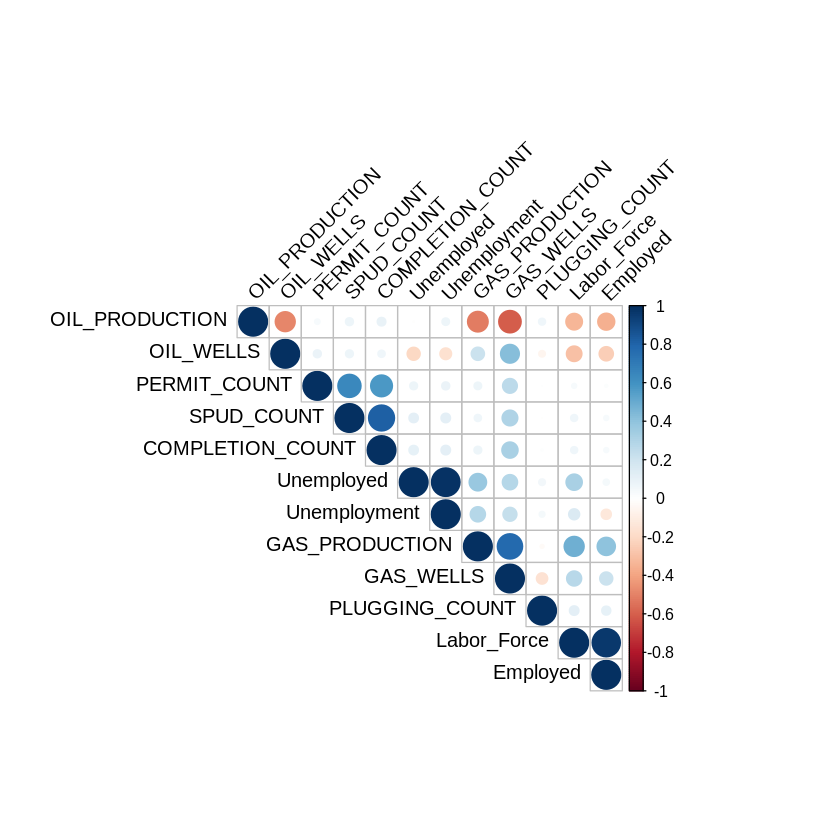

In [25]:
corrplot(allenres, type = "upper", order = "hclust", tl.col = "black", tl.srt = 45)

Warning message:
“Removed 3 rows containing missing values (geom_point).”

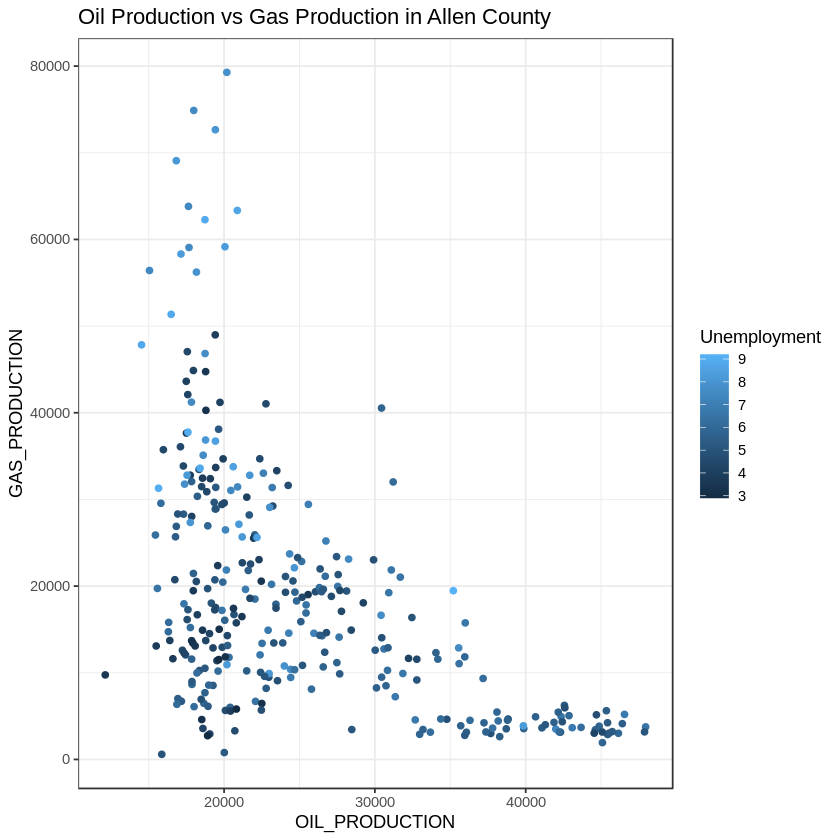

In [26]:
ggplot(data=allen,aes(x=OIL_PRODUCTION,y=GAS_PRODUCTION)) + geom_point(aes(color=Unemployment)) +
   labs(title="Oil Production vs Gas Production in Allen County",x="OIL_PRODUCTION", y="GAS_PRODUCTION")

Warning message:
“Removed 3 row(s) containing missing values (geom_path).”

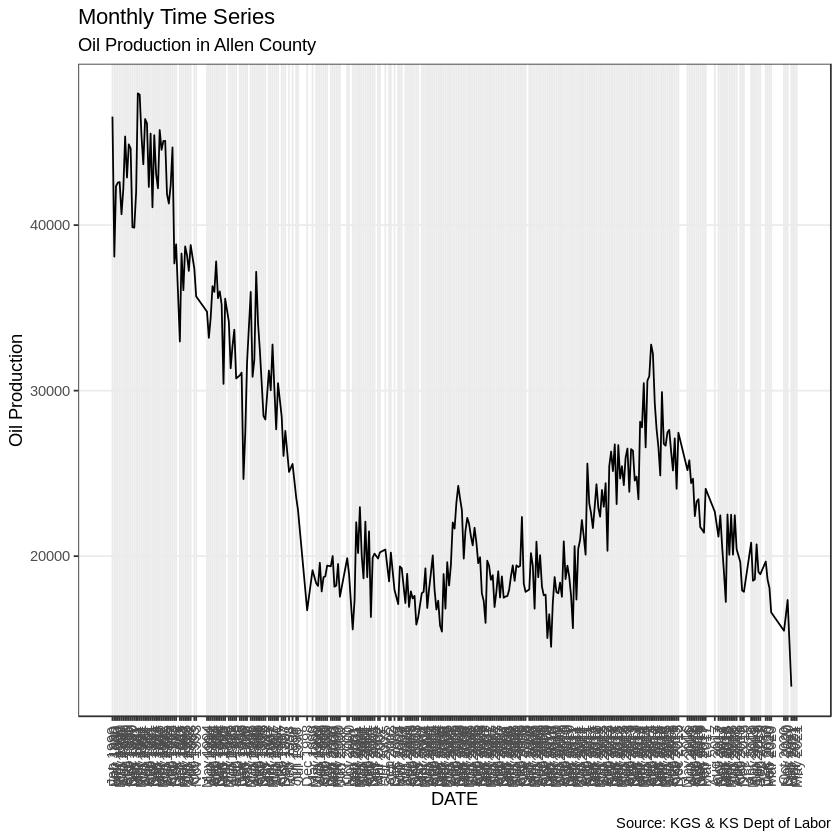

In [27]:
# labels and breaks for X axis text
lbls <- paste0(month.abb[month(allen$DATE)], " ", lubridate::year(allen$DATE))
brks <- allen$DATE

# plot
ggplot(allen, aes(x=DATE)) + 
  geom_line(aes(y=OIL_PRODUCTION)) + 
  labs(title="Monthly Time Series", 
       subtitle="Oil Production in Allen County", 
       caption="Source: KGS & KS Dept of Labor", 
       y="Oil Production") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())

Warning message:
“Removed 3 row(s) containing missing values (geom_path).”

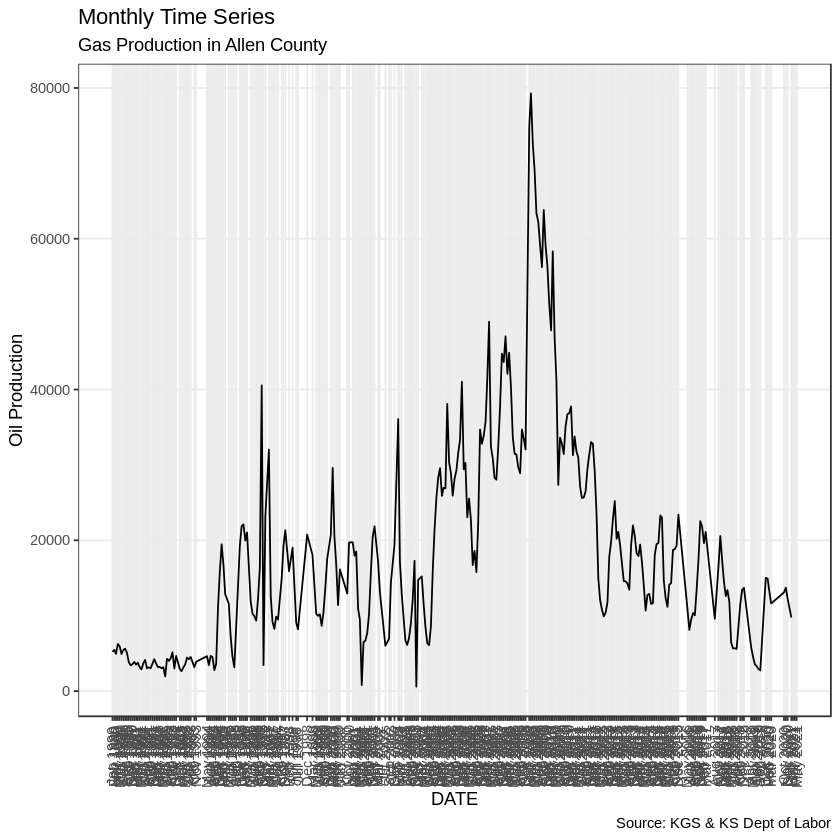

In [28]:
# plot
ggplot(allen, aes(x=DATE)) + 
  geom_line(aes(y=GAS_PRODUCTION)) + 
  labs(title="Monthly Time Series", 
       subtitle="Gas Production in Allen County", 
       caption="Source: KGS & KS Dept of Labor", 
       y="Oil Production") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())

In [29]:
ellis <- df[which(df$COUNTY=="Ellis"),]
elliscor <-ellis[-c(1:3,12:13)]
ellisres <- cor(elliscor[sapply(elliscor, is.numeric)], use='pairwise')
ellisres

,PERMIT_COUNT,SPUD_COUNT,COMPLETION_COUNT,PLUGGING_COUNT,OIL_PRODUCTION,OIL_WELLS,GAS_PRODUCTION,GAS_WELLS,Labor_Force,Employed,Unemployed,Unemployment
PERMIT_COUNT,1.0000000,0.79074769,0.72837160,0.27745010,0.3692732,0.01724030,-0.28986733,0.5782788,0.39424052,0.37075387,0.28777761,0.16244737
SPUD_COUNT,0.7907477,1.00000000,0.84406619,0.36474152,0.4389011,0.05862198,-0.26125745,0.5544848,0.35585084,0.33353510,0.27007675,0.15739679
COMPLETION_COUNT,0.7283716,0.84406619,1.00000000,0.39336707,0.4396217,0.06014513,-0.26460776,0.5400416,0.36337093,0.34139376,0.26829197,0.15487990
PLUGGING_COUNT,0.2774501,0.36474152,0.39336707,1.00000000,0.5186363,0.25566152,-0.03923891,0.1511889,-0.17613593,-0.18700245,0.06895967,0.12276985
OIL_PRODUCTION,0.3692732,0.43890105,0.43962167,0.51863635,1.0000000,0.53026072,0.26322930,0.4434293,-0.24486360,-0.26873634,0.17700622,0.26480691
OIL_WELLS,0.0172403,0.05862198,0.06014513,0.25566152,0.5302607,1.00000000,0.36752039,0.5520523,-0.26144008,-0.27363339,0.06553505,0.17389307
GAS_PRODUCTION,-0.2898673,-0.26125745,-0.26460776,-0.03923891,0.2632293,0.36752039,1.00000000,-0.2932502,-0.05477034,-0.06116769,0.04062737,0.05432864
GAS_WELLS,0.5782788,0.55448477,0.54004163,0.15118895,0.4434293,0.55205233,-0.29325015,1.0000000,0.42028574,0.40086848,0.21309190,0.12802176
Labor_Force,0.3942405,0.35585084,0.36337093,-0.17613593,-0.2448636,-0.26144008,-0.05477034,0.4202857,1.00000000,0.99444840,0.23036101,-0.08698934
Employed,0.3707539,0.33353510,0.34139376,-0.18700245,-0.2687363,-0.27363339,-0.06116769,0.4008685,0.99444840,1.00000000,0.12668682,-0.19105161


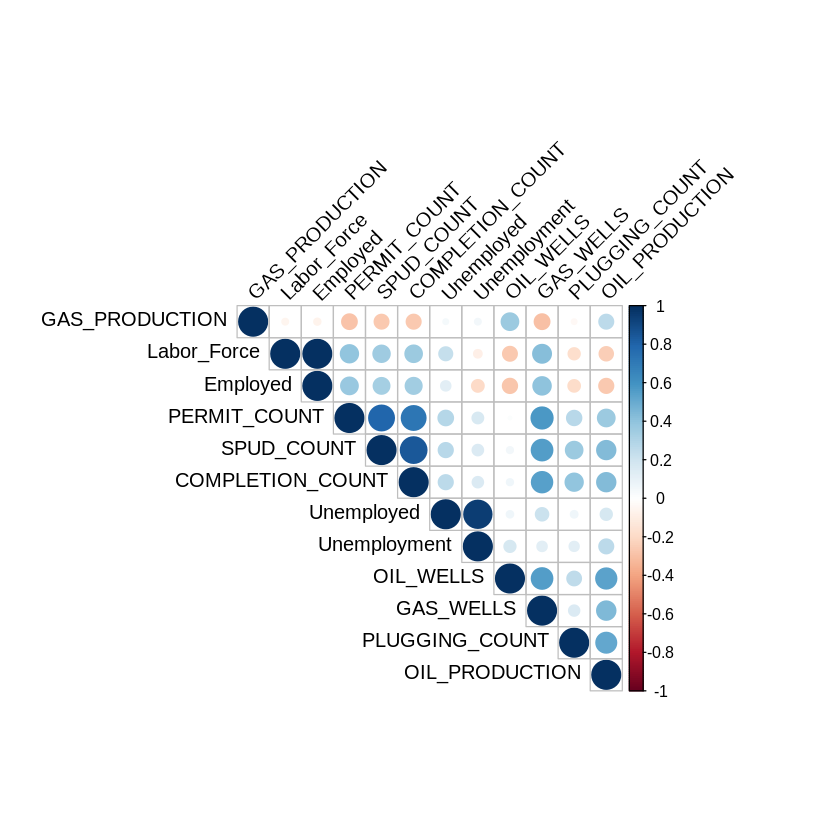

In [30]:
corrplot(ellisres, type = "upper", order = "hclust", tl.col = "black", tl.srt = 45)

Warning message:
“Removed 226 rows containing missing values (geom_point).”

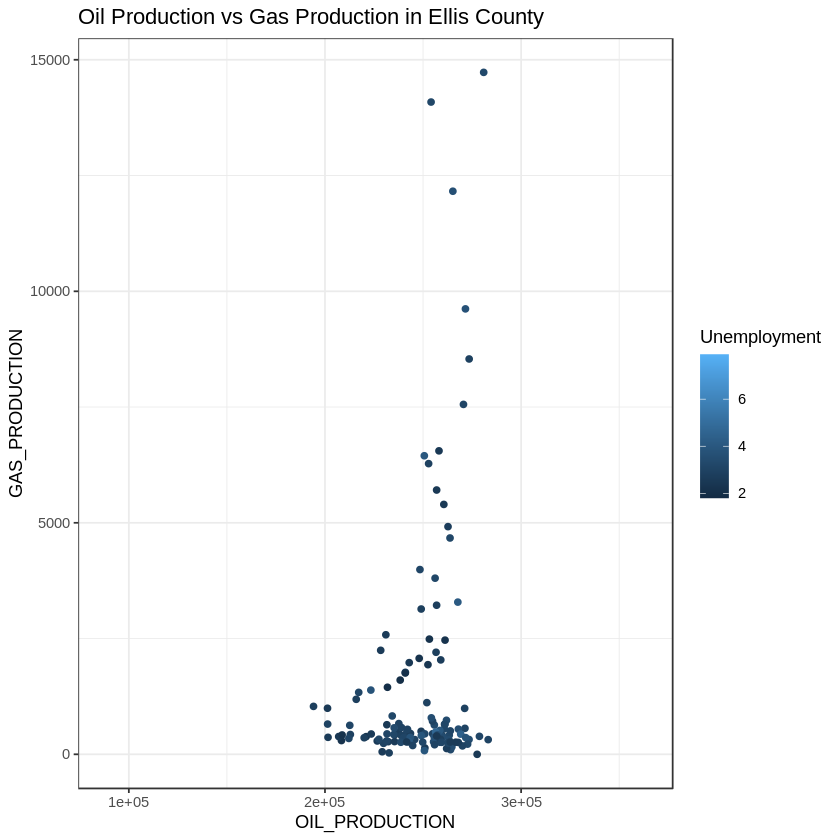

In [31]:
ggplot(data=ellis,aes(x=OIL_PRODUCTION,y=GAS_PRODUCTION)) + geom_point(aes(color=Unemployment)) +
   labs(title="Oil Production vs Gas Production in Ellis County",x="OIL_PRODUCTION", y="GAS_PRODUCTION")

Warning message:
“Removed 2 row(s) containing missing values (geom_path).”

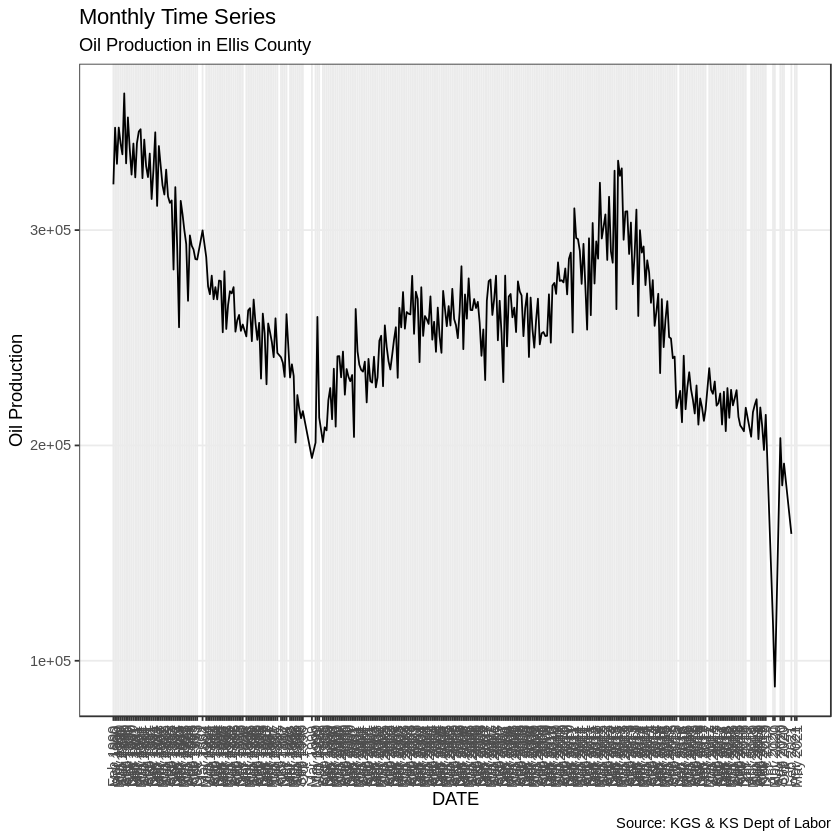

In [32]:
# labels and breaks for X axis text
lbls <- paste0(month.abb[month(ellis$DATE)], " ", lubridate::year(ellis$DATE))
brks <- ellis$DATE

# plot
ggplot(ellis, aes(x=DATE)) + 
  geom_line(aes(y=OIL_PRODUCTION)) + 
  labs(title="Monthly Time Series", 
       subtitle="Oil Production in Ellis County", 
       caption="Source: KGS & KS Dept of Labor", 
       y="Oil Production") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())

Warning message:
“Removed 201 row(s) containing missing values (geom_path).”

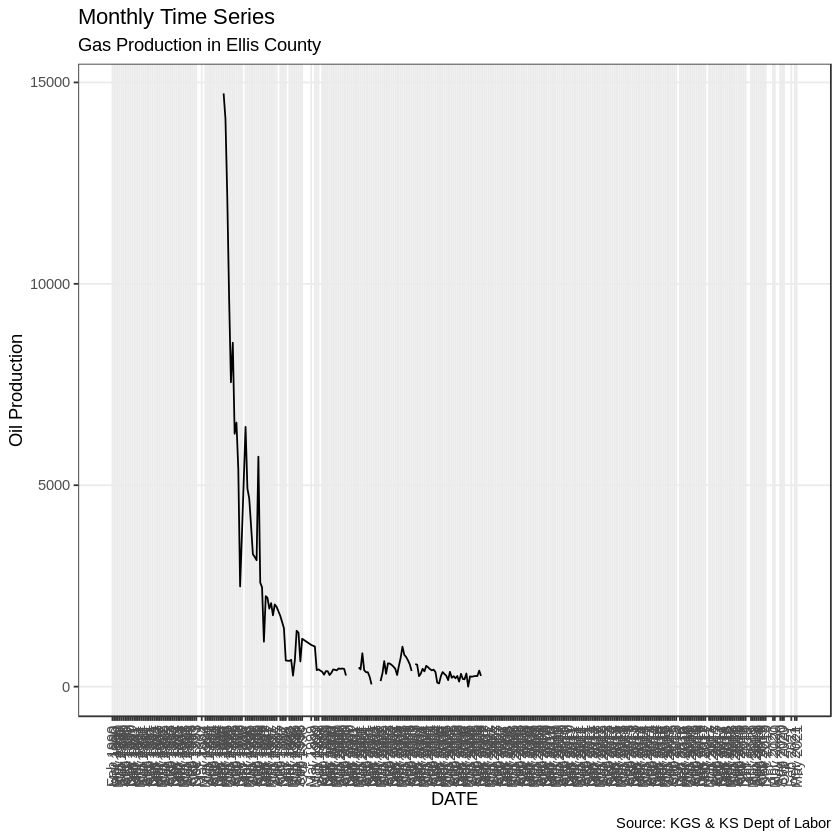

In [33]:
# plot
ggplot(ellis, aes(x=DATE)) + 
  geom_line(aes(y=GAS_PRODUCTION)) + 
  labs(title="Monthly Time Series", 
       subtitle="Gas Production in Ellis County", 
       caption="Source: KGS & KS Dept of Labor", 
       y="Oil Production") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())

In [34]:
woodson <- df[which(df$COUNTY=="Woodson"),]
woodsoncor <-woodson[-c(1:3,12:13)]
woodsonres <- cor(woodsoncor[sapply(woodsoncor, is.numeric)], use='pairwise')
woodsonres

,PERMIT_COUNT,SPUD_COUNT,COMPLETION_COUNT,PLUGGING_COUNT,OIL_PRODUCTION,OIL_WELLS,GAS_PRODUCTION,GAS_WELLS,Labor_Force,Employed,Unemployed,Unemployment
PERMIT_COUNT,1.00000000,0.82316310,0.69153754,0.09341388,0.08561677,0.21940938,-0.05680849,0.14174165,-0.04288120,-0.03956977,-0.02202468,-0.01093789
SPUD_COUNT,0.82316310,1.00000000,0.86365579,0.10306900,0.09329541,0.28317274,-0.08111449,0.12880755,-0.05111455,-0.03321497,-0.07555194,-0.06659639
COMPLETION_COUNT,0.69153754,0.86365579,1.00000000,0.10727436,0.06848418,0.30048125,-0.08505203,0.12316570,-0.03297461,-0.01628580,-0.06690642,-0.06121591
PLUGGING_COUNT,0.09341388,0.10306900,0.10727436,1.00000000,-0.02996026,0.11083367,-0.11093824,-0.06600141,-0.09647494,-0.07760048,-0.08991768,-0.07963351
OIL_PRODUCTION,0.08561677,0.09329541,0.06848418,-0.02996026,1.00000000,-0.50343213,-0.03058827,-0.51139004,0.18846183,0.26240758,-0.21590086,-0.26004086
OIL_WELLS,0.21940938,0.28317274,0.30048125,0.11083367,-0.50343213,1.00000000,-0.39031378,0.04562752,-0.52709586,-0.52056778,-0.14997189,-0.05302049
GAS_PRODUCTION,-0.05680849,-0.08111449,-0.08505203,-0.11093824,-0.03058827,-0.39031378,1.00000000,0.68523369,0.21787025,0.16484047,0.24055443,0.20408924
GAS_WELLS,0.14174165,0.12880755,0.12316570,-0.06600141,-0.51139004,0.04562752,0.68523369,1.00000000,0.14956664,0.04443663,0.40922091,0.39580658
Labor_Force,-0.04288120,-0.05111455,-0.03297461,-0.09647494,0.18846183,-0.52709586,0.21787025,0.14956664,1.00000000,0.96467879,0.36556640,0.15866263
Employed,-0.03956977,-0.03321497,-0.01628580,-0.07760048,0.26240758,-0.52056778,0.16484047,0.04443663,0.96467879,1.00000000,0.10745833,-0.10655481


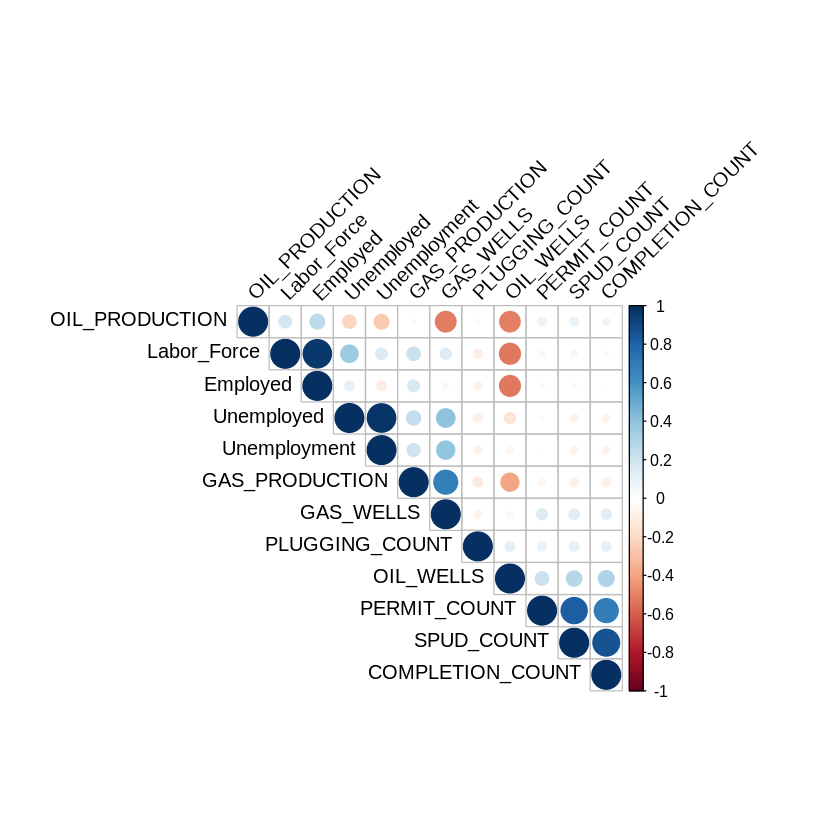

In [35]:
corrplot(woodsonres, type = "upper", order = "hclust", tl.col = "black", tl.srt = 45)

Warning message:
“Removed 9 rows containing missing values (geom_point).”

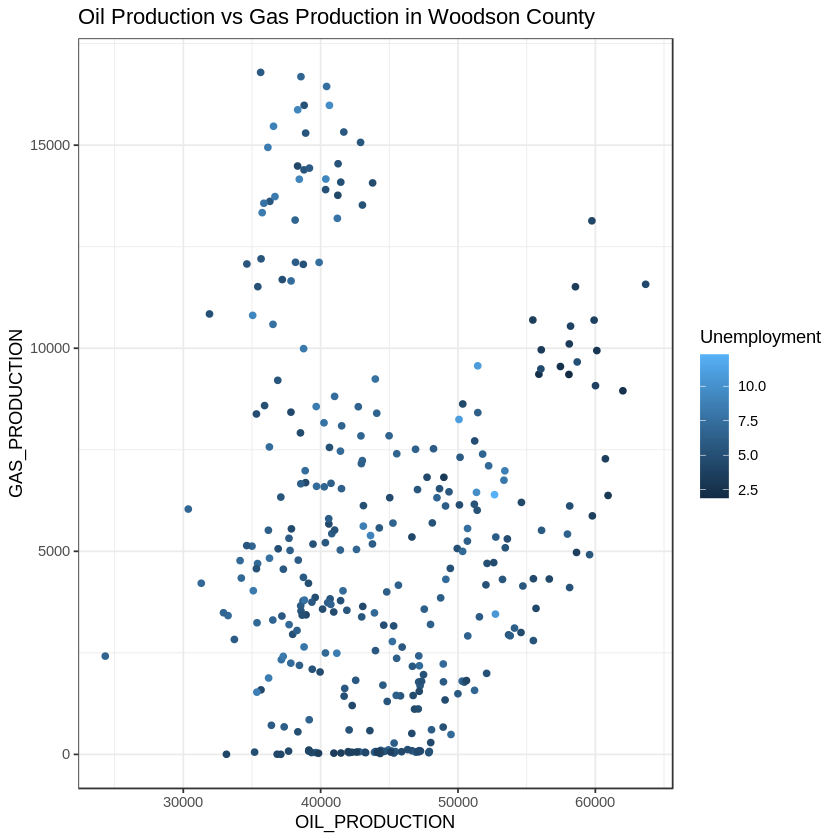

In [36]:
ggplot(data=woodson,aes(x=OIL_PRODUCTION,y=GAS_PRODUCTION)) + geom_point(aes(color=Unemployment)) +
   labs(title="Oil Production vs Gas Production in Woodson County",x="OIL_PRODUCTION", y="GAS_PRODUCTION")

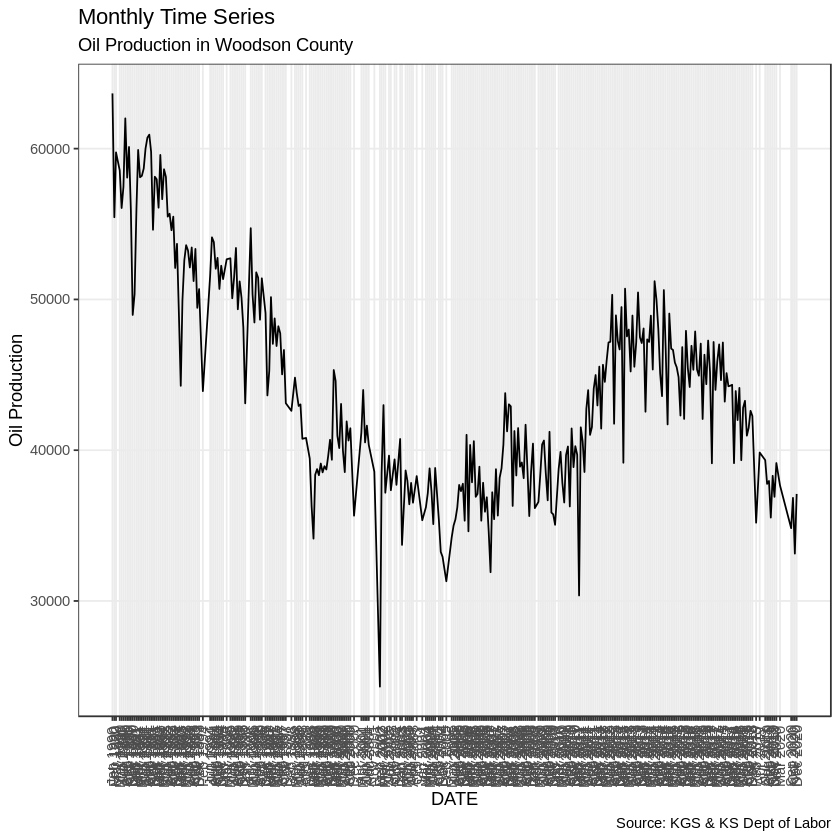

In [37]:
# labels and breaks for X axis text
lbls <- paste0(month.abb[month(woodson$DATE)], " ", lubridate::year(woodson$DATE))
brks <- woodson$DATE

# plot
ggplot(woodson, aes(x=DATE)) + 
  geom_line(aes(y=OIL_PRODUCTION)) + 
  labs(title="Monthly Time Series", 
       subtitle="Oil Production in Woodson County", 
       caption="Source: KGS & KS Dept of Labor", 
       y="Oil Production") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())

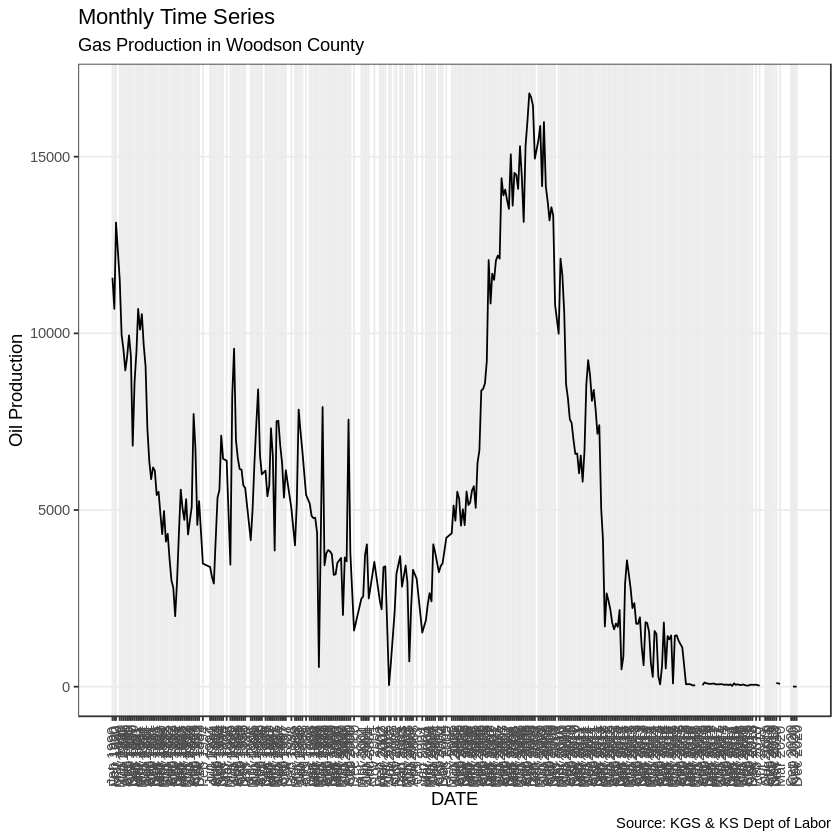

In [38]:
# plot
ggplot(woodson, aes(x=DATE)) + 
  geom_line(aes(y=GAS_PRODUCTION)) + 
  labs(title="Monthly Time Series", 
       subtitle="Gas Production in Woodson County", 
       caption="Source: KGS & KS Dept of Labor", 
       y="Oil Production") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())

In [39]:
anderson <- df[which(df$COUNTY=="Anderson"),]
andersoncor <-anderson[-c(1:3,12:13)]
andersonres <- cor(andersoncor[sapply(andersoncor, is.numeric)], use='pairwise')
andersonres

,PERMIT_COUNT,SPUD_COUNT,COMPLETION_COUNT,PLUGGING_COUNT,OIL_PRODUCTION,OIL_WELLS,GAS_PRODUCTION,GAS_WELLS,Labor_Force,Employed,Unemployed,Unemployment
PERMIT_COUNT,1.0000000,0.6456618,0.56422993,0.21002915,0.27536366,0.12025039,-0.10963443,0.3428122,0.21924838,0.17067908,0.19199807,0.15034789
SPUD_COUNT,0.6456618,1.0000000,0.91586945,0.32157022,0.35522959,0.12331018,-0.15071370,0.2944310,0.20802268,0.15247392,0.21236570,0.17470689
COMPLETION_COUNT,0.5642299,0.9158695,1.00000000,0.34918450,0.33053929,0.14197071,-0.04251735,0.3402384,0.23454945,0.18190282,0.20759132,0.16639570
PLUGGING_COUNT,0.2100292,0.3215702,0.34918450,1.00000000,0.15691892,-0.04291902,-0.20785340,-0.2270535,0.18528989,0.13766531,0.18324457,0.14884128
OIL_PRODUCTION,0.2753637,0.3552296,0.33053929,0.15691892,1.00000000,-0.52814960,-0.04045698,0.4703667,-0.46982390,-0.55487731,0.19191639,0.31222006
OIL_WELLS,0.1202504,0.1233102,0.14197071,-0.04291902,-0.52814960,1.00000000,-0.10788165,-0.2355719,0.50692986,0.61393618,-0.25567622,-0.38658582
GAS_PRODUCTION,-0.1096344,-0.1507137,-0.04251735,-0.20785340,-0.04045698,-0.10788165,1.00000000,0.4765572,-0.41452343,-0.40142977,-0.01177079,0.05046819
GAS_WELLS,0.3428122,0.2944310,0.34023844,-0.22705351,0.47036674,-0.23557186,0.47655724,1.0000000,-0.66215024,-0.50587406,-0.31794028,-0.24179517
Labor_Force,0.2192484,0.2080227,0.23454945,0.18528989,-0.46982390,0.50692986,-0.41452343,-0.6621502,1.00000000,0.95467304,0.31361963,0.09502984
Employed,0.1706791,0.1524739,0.18190282,0.13766531,-0.55487731,0.61393618,-0.40142977,-0.5058741,0.95467304,1.00000000,0.01676487,-0.20520830


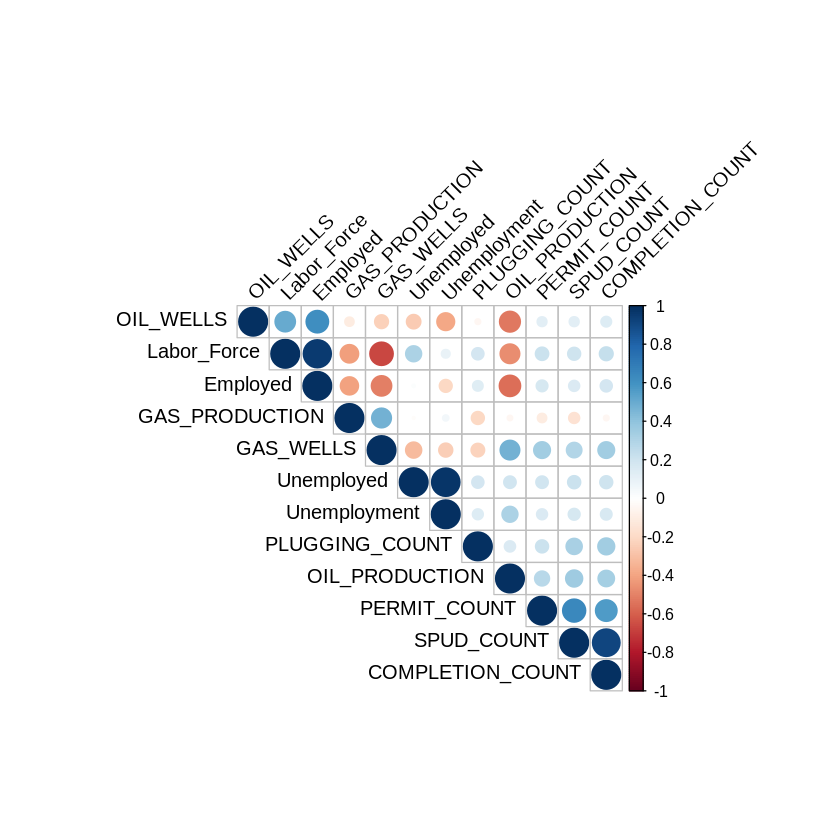

In [40]:
corrplot(andersonres, type = "upper", order = "hclust", tl.col = "black", tl.srt = 45)

Warning message:
“Removed 195 rows containing missing values (geom_point).”

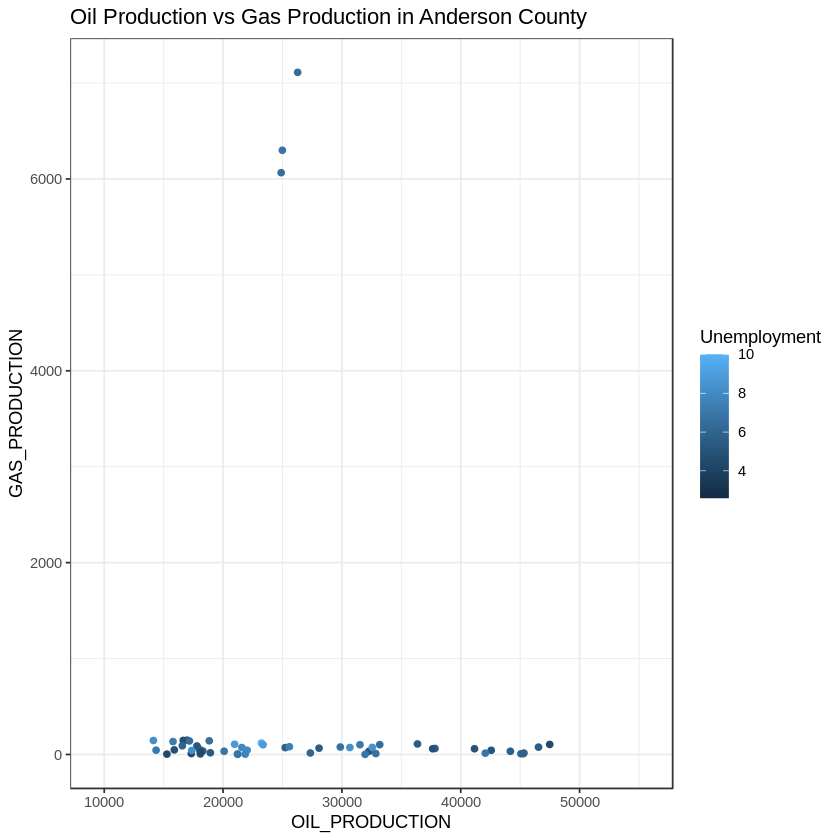

In [41]:
ggplot(data=anderson,aes(x=OIL_PRODUCTION,y=GAS_PRODUCTION)) + geom_point(aes(color=Unemployment)) +
   labs(title="Oil Production vs Gas Production in Anderson County",x="OIL_PRODUCTION", y="GAS_PRODUCTION")

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”

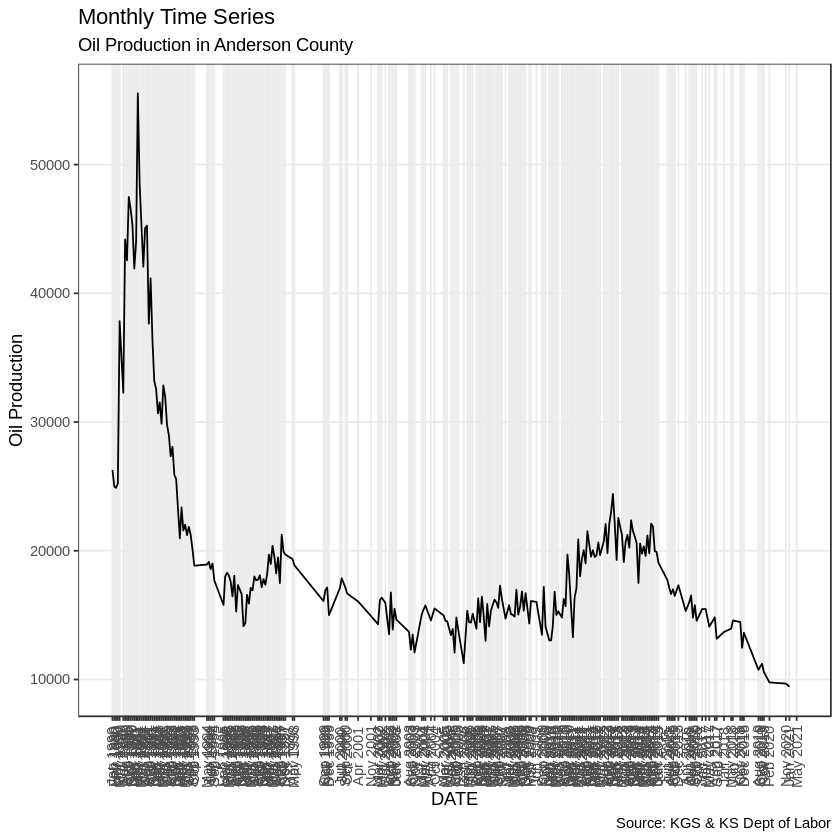

In [42]:
# labels and breaks for X axis text
lbls <- paste0(month.abb[month(anderson$DATE)], " ", lubridate::year(anderson$DATE))
brks <- anderson$DATE

# plot
ggplot(anderson, aes(x=DATE)) + 
  geom_line(aes(y=OIL_PRODUCTION)) + 
  labs(title="Monthly Time Series", 
       subtitle="Oil Production in Anderson County", 
       caption="Source: KGS & KS Dept of Labor", 
       y="Oil Production") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())

Warning message:
“Removed 175 row(s) containing missing values (geom_path).”

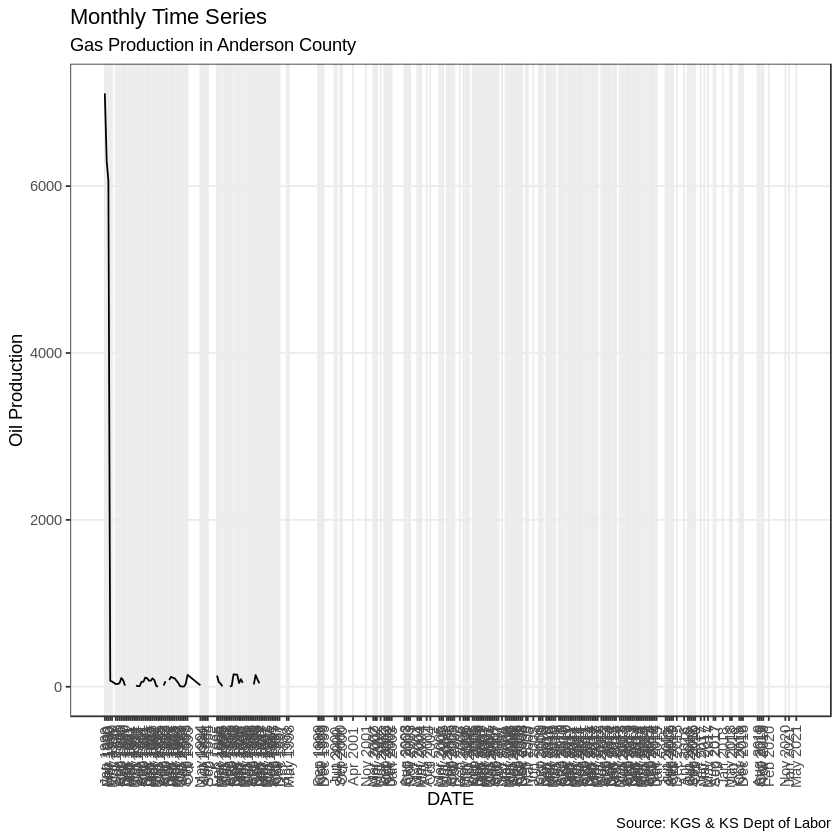

In [43]:
# plot
ggplot(anderson, aes(x=DATE)) + 
  geom_line(aes(y=GAS_PRODUCTION)) + 
  labs(title="Monthly Time Series", 
       subtitle="Gas Production in Anderson County", 
       caption="Source: KGS & KS Dept of Labor", 
       y="Oil Production") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())

In [44]:
wilson <- df[which(df$COUNTY=="Wilson"),]
wilsoncor <-wilson[-c(1:3,12:13)]
wilsonres <- cor(wilsoncor[sapply(wilsoncor, is.numeric)], use='pairwise')
wilsonres

,PERMIT_COUNT,SPUD_COUNT,COMPLETION_COUNT,PLUGGING_COUNT,OIL_PRODUCTION,OIL_WELLS,GAS_PRODUCTION,GAS_WELLS,Labor_Force,Employed,Unemployed,Unemployment
PERMIT_COUNT,1.00000000,0.883612631,0.80961951,-0.047240324,-0.23381801,0.08565766,0.26951076,0.16611449,0.39489420,0.4032680,-0.11384130,-0.1885234
SPUD_COUNT,0.88361263,1.000000000,0.93053852,-0.001114096,-0.24611758,0.12032299,0.36078976,0.23793573,0.40124134,0.4038936,-0.08462167,-0.1595559
COMPLETION_COUNT,0.80961951,0.930538525,1.00000000,0.045313263,-0.26792036,0.13444175,0.41603678,0.27708126,0.40914144,0.4068790,-0.05995329,-0.1392643
PLUGGING_COUNT,-0.04724032,-0.001114096,0.04531326,1.000000000,0.04209367,-0.06048655,0.07828382,0.04398048,0.10164393,0.1013336,-0.01622886,-0.0541553
OIL_PRODUCTION,-0.23381801,-0.246117581,-0.26792036,0.042093673,1.00000000,-0.43650331,-0.36492421,-0.32922922,-0.10889412,-0.1242282,0.10045007,0.1313406
OIL_WELLS,0.08565766,0.120322990,0.13444175,-0.060486553,-0.43650331,1.00000000,0.62090170,0.77349976,-0.36234427,-0.4016483,0.27210811,0.3683422
GAS_PRODUCTION,0.26951076,0.360789765,0.41603678,0.078283823,-0.36492421,0.62090170,1.00000000,0.91866680,-0.02393118,-0.1175429,0.50053503,0.4835242
GAS_WELLS,0.16611449,0.237935729,0.27708126,0.043980481,-0.32922922,0.77349976,0.91866680,1.00000000,-0.34343545,-0.4163561,0.44701719,0.5213748
Labor_Force,0.39489420,0.401241342,0.40914144,0.101643933,-0.10889412,-0.36234427,-0.02393118,-0.34343545,1.00000000,0.9821720,-0.08133000,-0.3483428
Employed,0.40326803,0.403893569,0.40687896,0.101333563,-0.12422817,-0.40164828,-0.11754292,-0.41635606,0.98217203,1.0000000,-0.26724163,-0.5172439


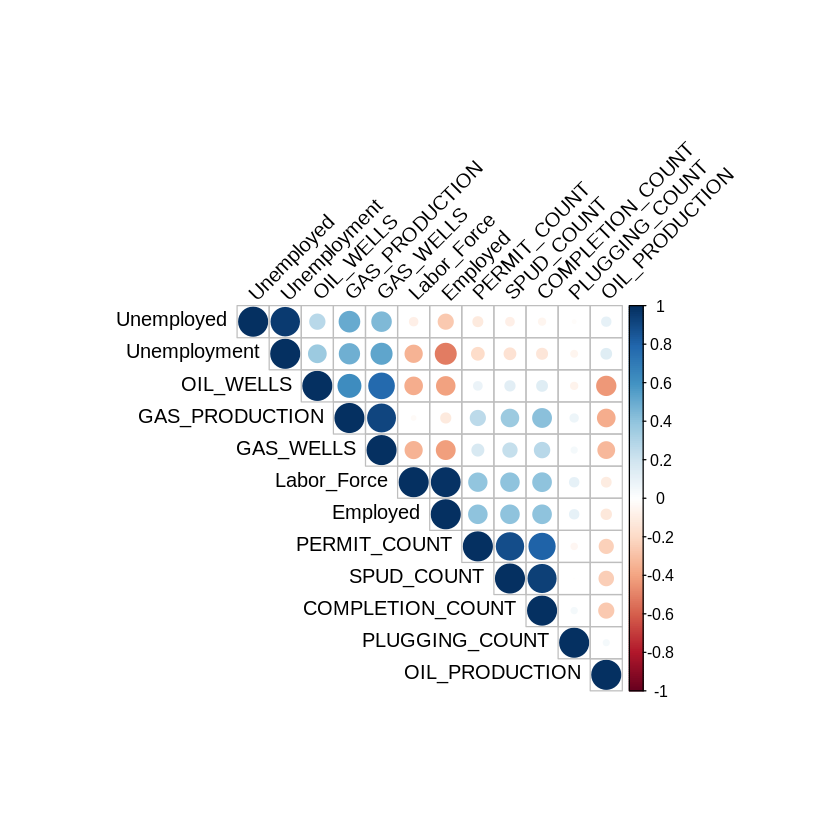

In [45]:
corrplot(wilsonres, type = "upper", order = "hclust", tl.col = "black", tl.srt = 45)

Warning message:
“Removed 1 rows containing missing values (geom_point).”

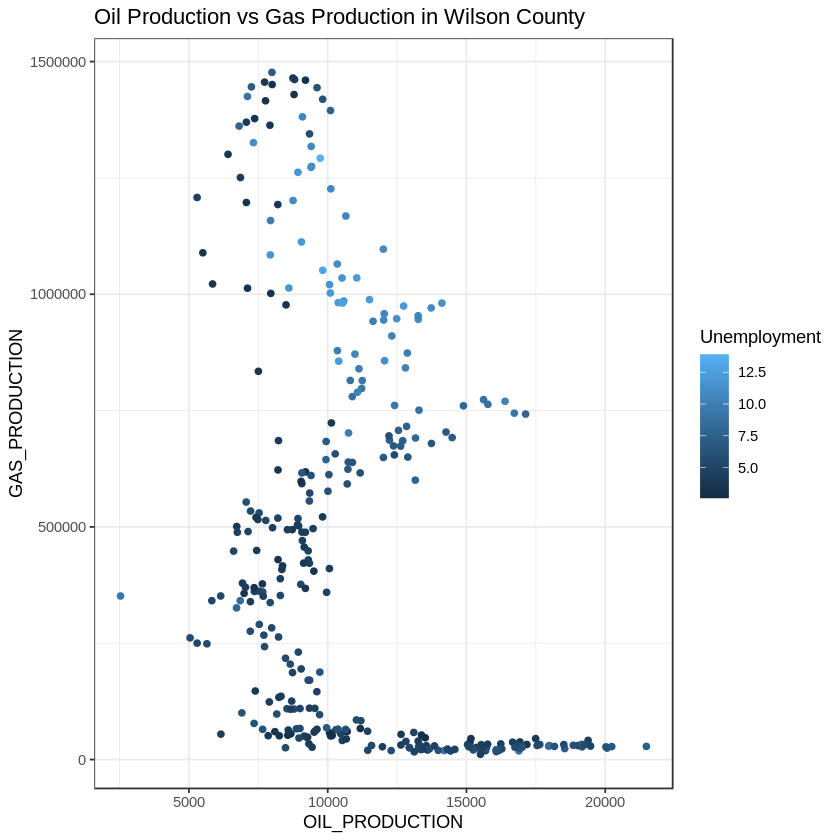

In [46]:
ggplot(data=wilson,aes(x=OIL_PRODUCTION,y=GAS_PRODUCTION)) + geom_point(aes(color=Unemployment)) +
   labs(title="Oil Production vs Gas Production in Wilson County",x="OIL_PRODUCTION", y="GAS_PRODUCTION")

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”

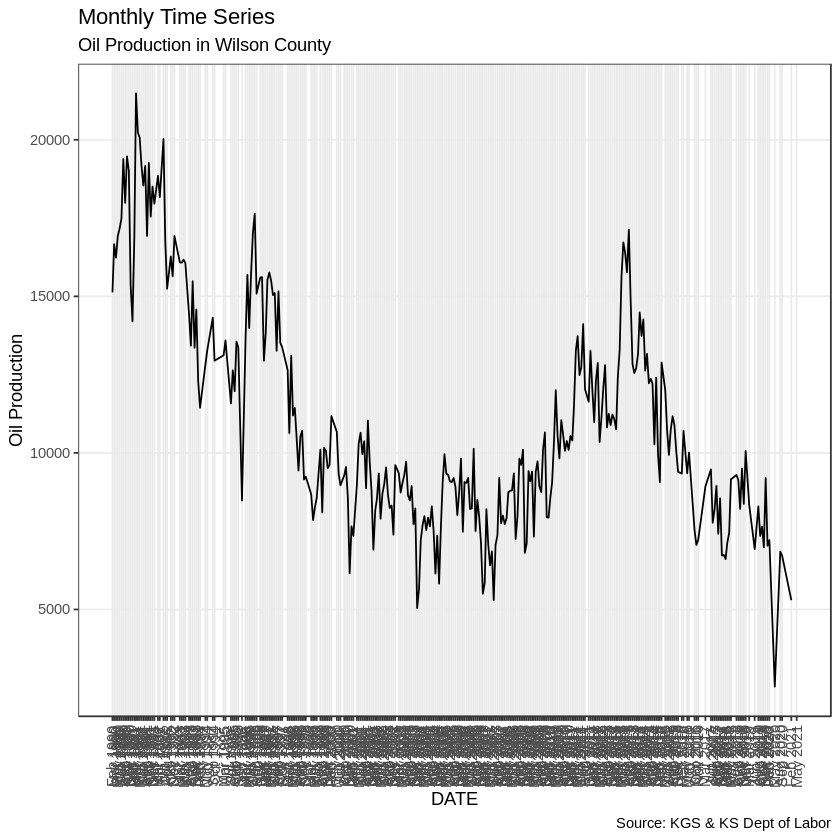

In [47]:
# labels and breaks for X axis text
lbls <- paste0(month.abb[month(wilson$DATE)], " ", lubridate::year(wilson$DATE))
brks <- wilson$DATE

# plot
ggplot(wilson, aes(x=DATE)) + 
  geom_line(aes(y=OIL_PRODUCTION)) + 
  labs(title="Monthly Time Series", 
       subtitle="Oil Production in Wilson County", 
       caption="Source: KGS & KS Dept of Labor", 
       y="Oil Production") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”

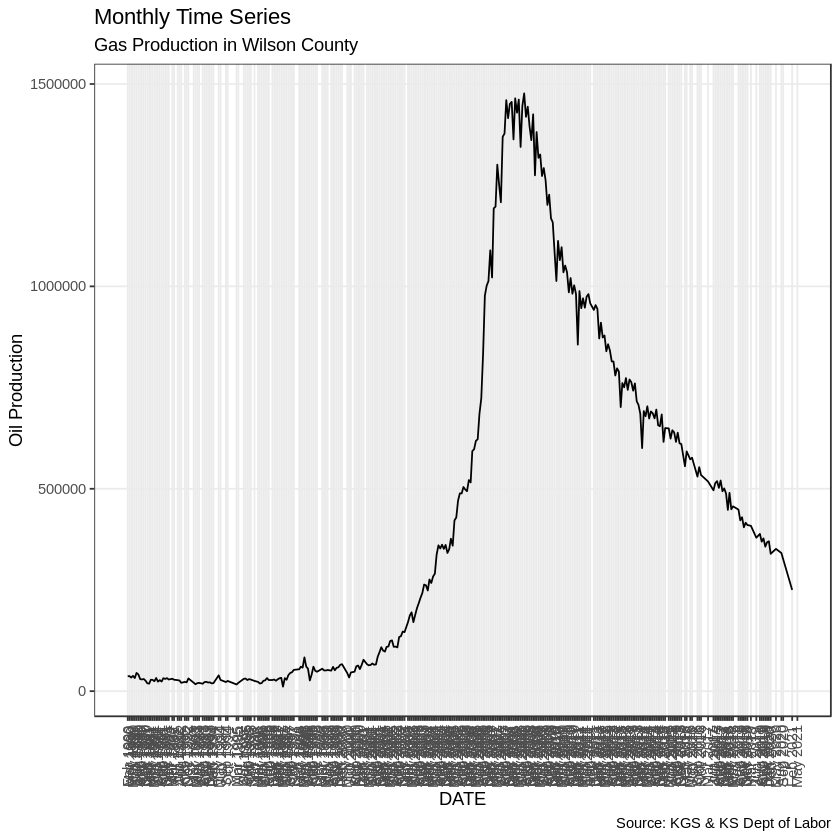

In [48]:
# plot
ggplot(wilson, aes(x=DATE)) + 
  geom_line(aes(y=GAS_PRODUCTION)) + 
  labs(title="Monthly Time Series", 
       subtitle="Gas Production in Wilson County", 
       caption="Source: KGS & KS Dept of Labor", 
       y="Oil Production") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())

In [49]:
neosho <- df[which(df$COUNTY=="Neosho"),]
neoshocor <-neosho[-c(1:3,12:13)]
neoshores <- cor(neoshocor[sapply(neoshocor, is.numeric)], use='pairwise')
neoshores

,PERMIT_COUNT,SPUD_COUNT,COMPLETION_COUNT,PLUGGING_COUNT,OIL_PRODUCTION,OIL_WELLS,GAS_PRODUCTION,GAS_WELLS,Labor_Force,Employed,Unemployed,Unemployment
PERMIT_COUNT,1.00000000,0.80908556,0.75549422,0.02693105,-0.2567201,0.05163065,0.2834809,0.2253029,0.3186084,0.3215087,-0.1487982,-0.2204462
SPUD_COUNT,0.80908556,1.00000000,0.95370827,0.01239762,-0.2740520,0.05217645,0.3521623,0.2885627,0.3198587,0.3227345,-0.1490702,-0.2154912
COMPLETION_COUNT,0.75549422,0.95370827,1.00000000,0.03570656,-0.2777566,0.06191031,0.3609391,0.2964586,0.3142225,0.3188695,-0.1623222,-0.2233939
PLUGGING_COUNT,0.02693105,0.01239762,0.03570656,1.00000000,0.1711712,-0.07029637,-0.1929433,-0.2174620,0.2277468,0.2398125,-0.1934565,-0.2446087
OIL_PRODUCTION,-0.25672007,-0.27405197,-0.27775661,0.17117122,1.0000000,-0.40079400,-0.5877072,-0.5370375,0.1465983,0.1624052,-0.1967697,-0.2218684
OIL_WELLS,0.05163065,0.05217645,0.06191031,-0.07029637,-0.4007940,1.00000000,0.2409213,0.2988007,-0.3679768,-0.3545043,0.0337557,0.1757071
GAS_PRODUCTION,0.28348086,0.35216234,0.36093912,-0.19294332,-0.5877072,0.24092128,1.0000000,0.9528335,-0.2670421,-0.2990102,0.3859181,0.4455903
GAS_WELLS,0.22530295,0.28856266,0.29645863,-0.21746197,-0.5370375,0.29880074,0.9528335,1.0000000,-0.4842060,-0.5058684,0.3854528,0.5263534
Labor_Force,0.31860837,0.31985866,0.31422248,0.22774684,0.1465983,-0.36797682,-0.2670421,-0.4842060,1.0000000,0.9941471,-0.3366710,-0.6542984
Employed,0.32150867,0.32273454,0.31886951,0.23981245,0.1624052,-0.35450429,-0.2990102,-0.5058684,0.9941471,1.0000000,-0.4364288,-0.7316686


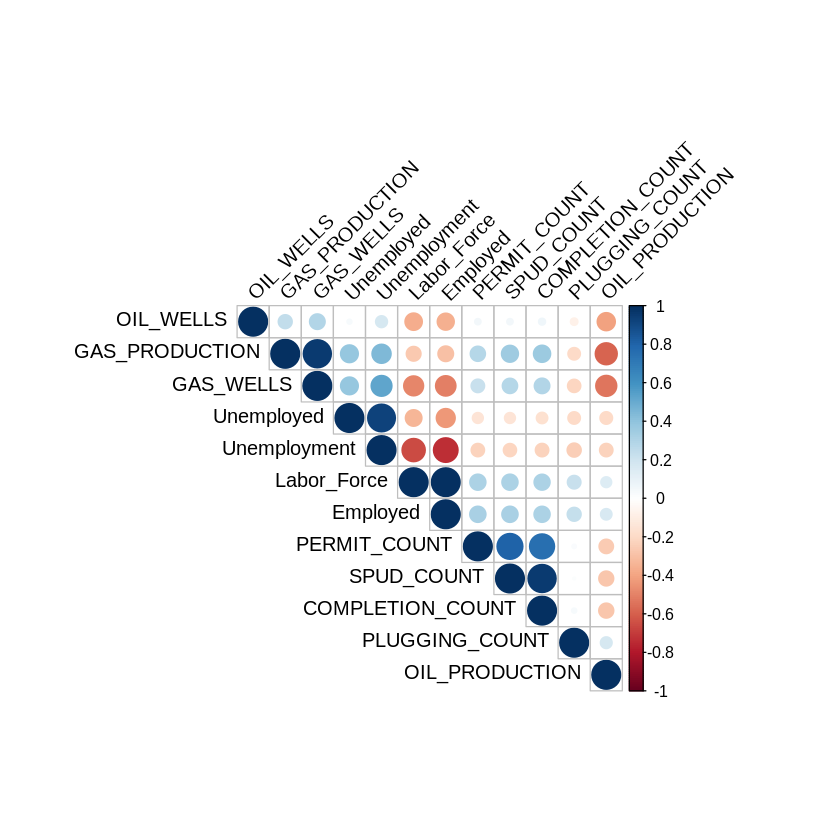

In [50]:
corrplot(neoshores, type = "upper", order = "hclust", tl.col = "black", tl.srt = 45)

Warning message:
“Removed 1 rows containing missing values (geom_point).”

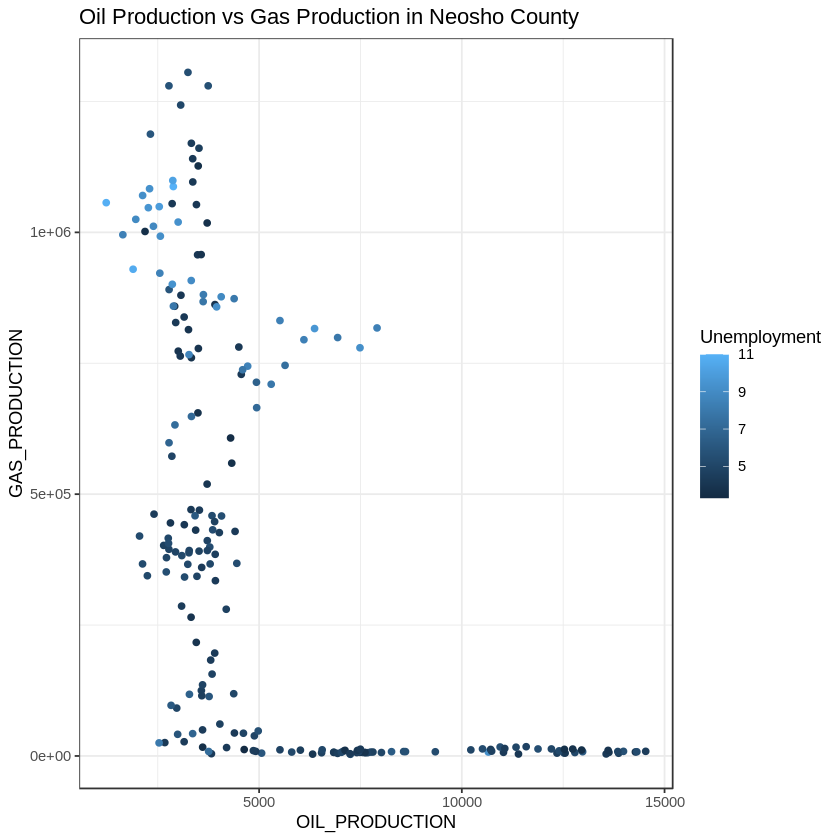

In [51]:
ggplot(data=neosho,aes(x=OIL_PRODUCTION,y=GAS_PRODUCTION)) + geom_point(aes(color=Unemployment)) +
   labs(title="Oil Production vs Gas Production in Neosho County",x="OIL_PRODUCTION", y="GAS_PRODUCTION")

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”

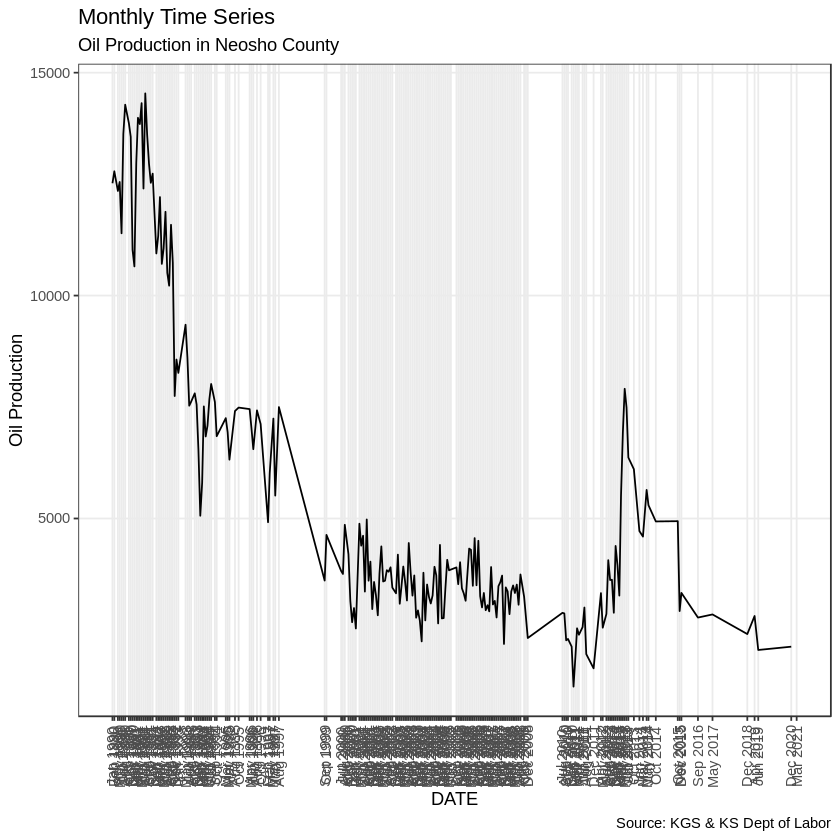

In [52]:
# labels and breaks for X axis text
lbls <- paste0(month.abb[month(neosho$DATE)], " ", lubridate::year(neosho$DATE))
brks <- neosho$DATE

# plot
ggplot(neosho, aes(x=DATE)) + 
  geom_line(aes(y=OIL_PRODUCTION)) + 
  labs(title="Monthly Time Series", 
       subtitle="Oil Production in Neosho County", 
       caption="Source: KGS & KS Dept of Labor", 
       y="Oil Production") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”

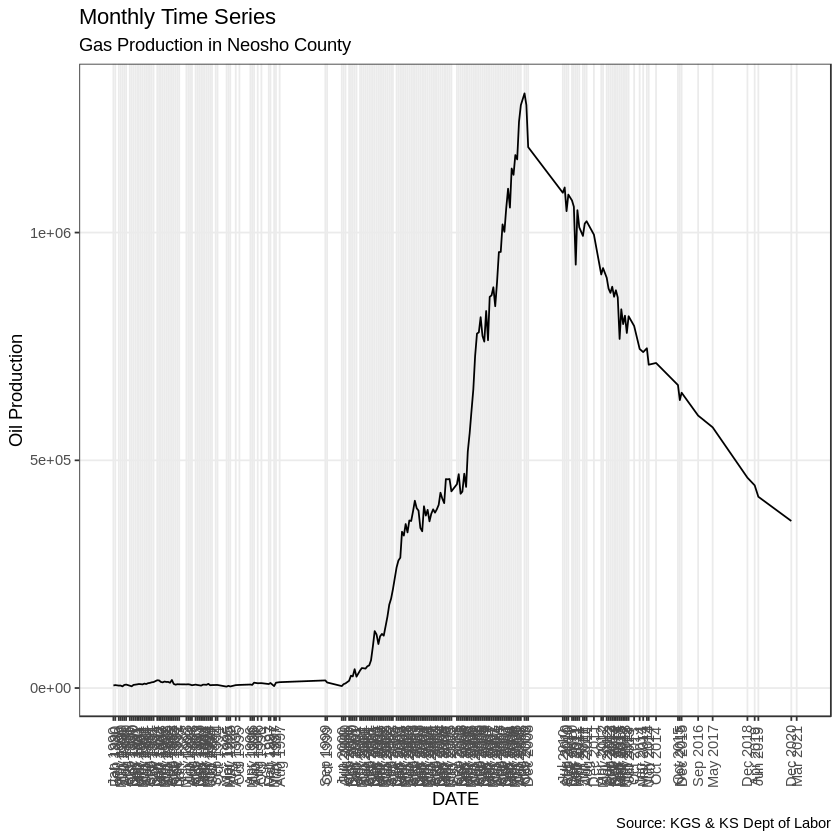

In [53]:
# plot
ggplot(neosho, aes(x=DATE)) + 
  geom_line(aes(y=GAS_PRODUCTION)) + 
  labs(title="Monthly Time Series", 
       subtitle="Gas Production in Neosho County", 
       caption="Source: KGS & KS Dept of Labor", 
       y="Oil Production") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())

In [54]:
franklin <- df[which(df$COUNTY=="Franklin"),]
franklincor <-franklin[-c(1:3,12:13)]
franklinres <- cor(franklincor[sapply(franklincor, is.numeric)], use='pairwise')
franklinres

,PERMIT_COUNT,SPUD_COUNT,COMPLETION_COUNT,PLUGGING_COUNT,OIL_PRODUCTION,OIL_WELLS,GAS_PRODUCTION,GAS_WELLS,Labor_Force,Employed,Unemployed,Unemployment
PERMIT_COUNT,1.000000000,0.69374238,0.60657248,-0.007521933,0.315539593,0.24141422,-0.01969169,0.27164332,0.22552081,0.16733621,0.24747917,0.189570898
SPUD_COUNT,0.693742377,1.00000000,0.89144913,0.077438171,0.397554948,0.22892992,-0.01115858,0.17973922,0.18865696,0.12841800,0.25408061,0.205003023
COMPLETION_COUNT,0.606572482,0.89144913,1.00000000,0.061774860,0.381323166,0.26203314,-0.00905385,0.11415296,0.22151503,0.16372141,0.24569750,0.188360456
PLUGGING_COUNT,-0.007521933,0.07743817,0.06177486,1.000000000,-0.001972371,0.07246742,-0.07227675,0.06658920,0.05560049,0.08142831,-0.10243347,-0.122693884
OIL_PRODUCTION,0.315539593,0.39755495,0.38132317,-0.001972371,1.000000000,-0.19067894,0.71548840,0.03268447,-0.38665889,-0.36989837,-0.08863386,0.007823404
OIL_WELLS,0.241414220,0.22892992,0.26203314,0.072467420,-0.190678942,1.00000000,-0.62316839,0.01351947,0.89016218,0.89830960,0.01375021,-0.199782677
GAS_PRODUCTION,-0.019691688,-0.01115858,-0.00905385,-0.072276752,0.715488396,-0.62316839,1.00000000,-0.10062694,-0.68145792,-0.64969648,-0.28231520,-0.080646878
GAS_WELLS,0.271643319,0.17973922,0.11415296,0.066589202,0.032684467,0.01351947,-0.10062694,1.00000000,-0.12153332,-0.10980802,-0.08027922,-0.049532594
Labor_Force,0.225520808,0.18865696,0.22151503,0.055600489,-0.386658893,0.89016218,-0.68145792,-0.12153332,1.00000000,0.97021268,0.16885379,-0.069579094
Employed,0.167336209,0.12841800,0.16372141,0.081428306,-0.369898374,0.89830960,-0.64969648,-0.10980802,0.97021268,1.00000000,-0.07495214,-0.308812661


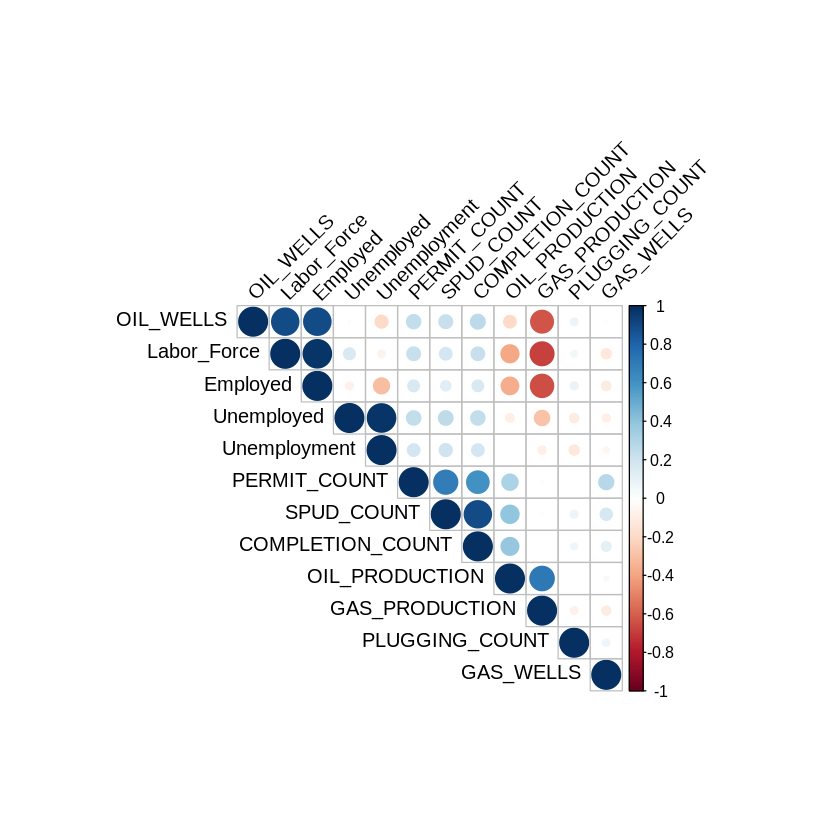

In [55]:
corrplot(franklinres, type = "upper", order = "hclust", tl.col = "black", tl.srt = 45)

Warning message:
“Removed 110 rows containing missing values (geom_point).”

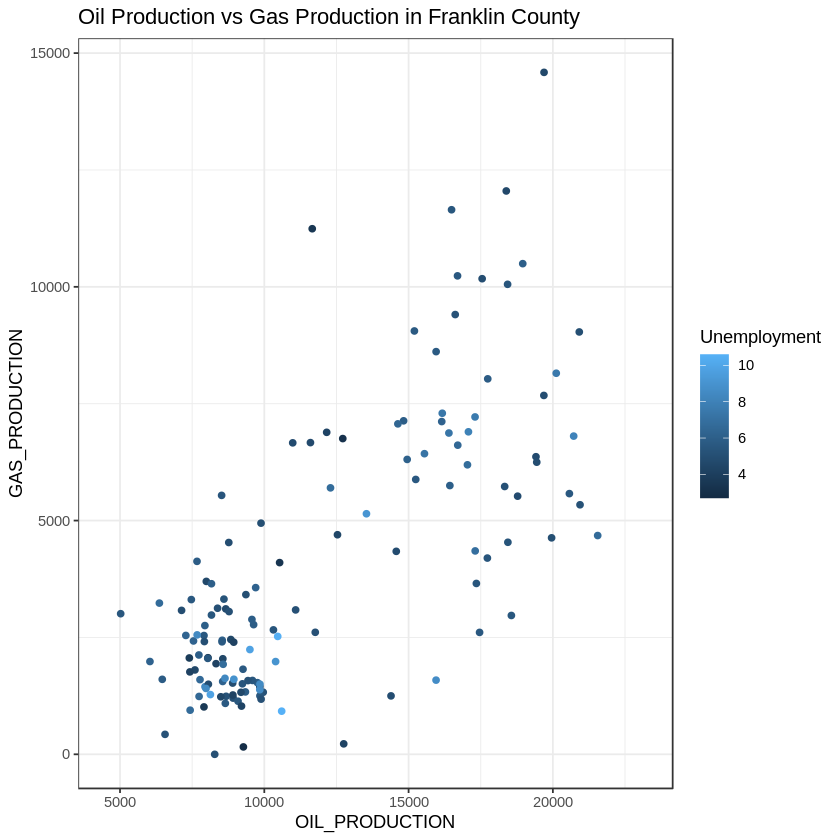

In [56]:
ggplot(data=franklin,aes(x=OIL_PRODUCTION,y=GAS_PRODUCTION)) + geom_point(aes(color=Unemployment)) +
   labs(title="Oil Production vs Gas Production in Franklin County",x="OIL_PRODUCTION", y="GAS_PRODUCTION")

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”

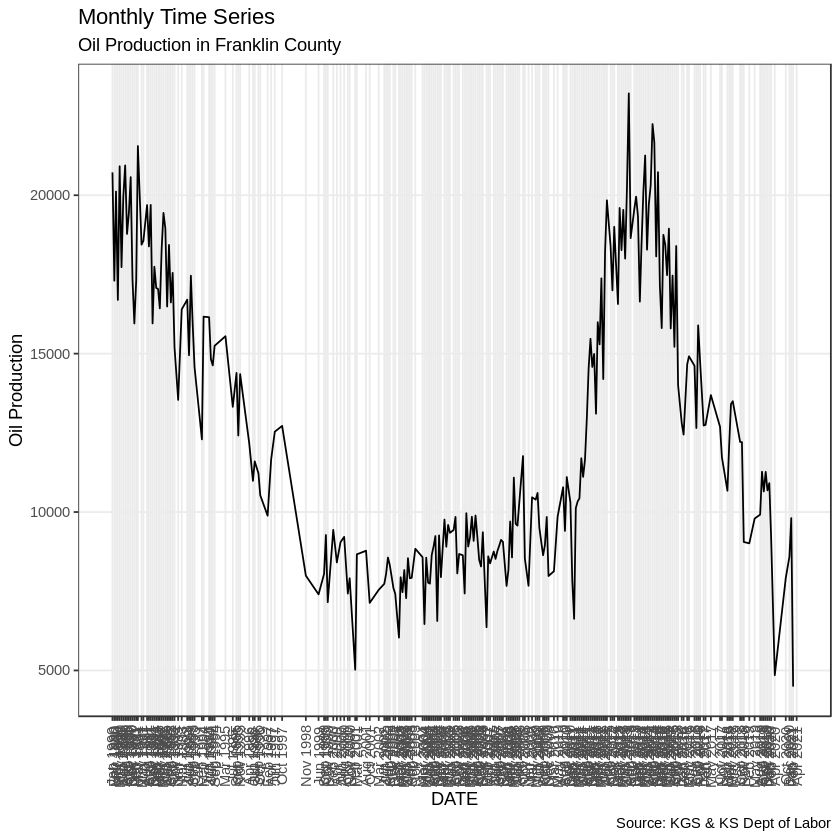

In [57]:
# labels and breaks for X axis text
lbls <- paste0(month.abb[month(franklin$DATE)], " ", lubridate::year(franklin$DATE))
brks <- franklin$DATE

# plot
ggplot(franklin, aes(x=DATE)) + 
  geom_line(aes(y=OIL_PRODUCTION)) + 
  labs(title="Monthly Time Series", 
       subtitle="Oil Production in Franklin County", 
       caption="Source: KGS & KS Dept of Labor", 
       y="Oil Production") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())

Warning message:
“Removed 25 row(s) containing missing values (geom_path).”

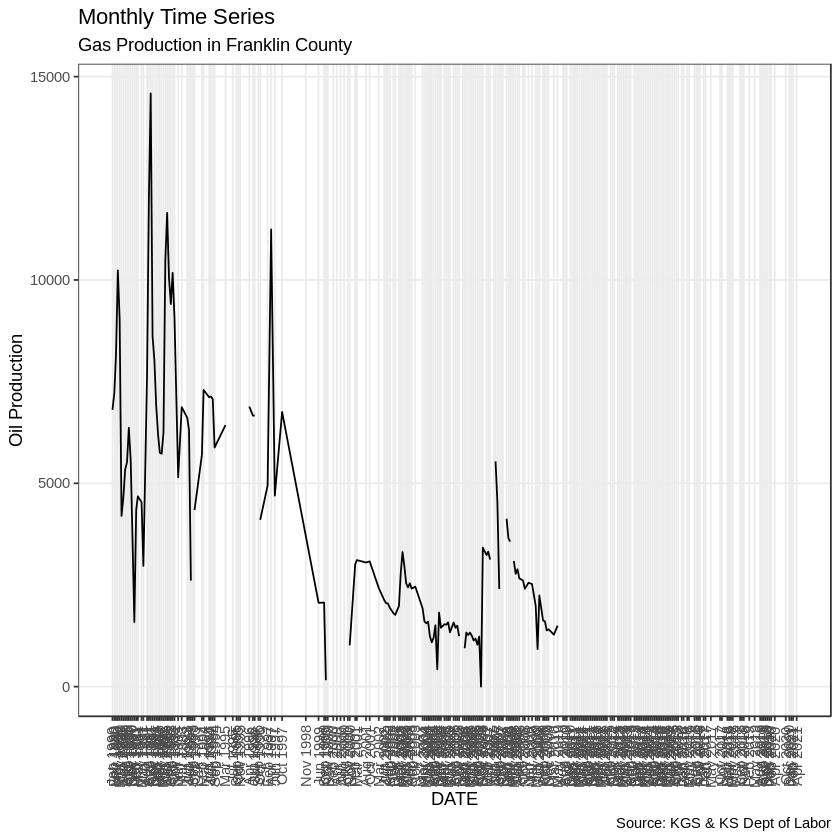

In [58]:
# plot
ggplot(franklin, aes(x=DATE)) + 
  geom_line(aes(y=GAS_PRODUCTION)) + 
  labs(title="Monthly Time Series", 
       subtitle="Gas Production in Franklin County", 
       caption="Source: KGS & KS Dept of Labor", 
       y="Oil Production") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())

***
Next, let's dive deeper into some of the counties that have higher negative or positive correlations between well activity and economic indicators to see if we can find any patterns in production levels and whether that makes a difference in whether well activity plays a role in the economy of the county. We're looking for positive correlations between well acitivy and labor force as well as negative correlations between well activity and unemployment.

Here are the significant correlations .7 or higher (or -.7 and below) Ian discovered in his multivariate analysis notebook between well activity and economic indicators at the county level:


### Atchison 
('Employed', 'PLUGGING_COUNT', -0.7172569287877657)

### Chautauqua
('Labor_Force', 'GAS_PRODUCTION', 0.790785646667474)
('Employed', 'GAS_PRODUCTION', 0.764472872767208)

### Doniphan
('Labor_Force', 'PERMIT_COUNT', 0.8152561718871899)
('Employed', 'PERMIT_COUNT', 0.7758315791436188)
('Employed', 'COMPLETION_COUNT', -0.7115805869978471)
('Employed', 'PLUGGING_COUNT', -0.7115805869978471)

### Douglas
('Labor_Force', 'OIL_WELLS', 0.8691801592196353)
('Employed', 'OIL_WELLS', 0.8589433373445721)

### Edwards
('Employed', 'OIL_PRODUCTION', 0.7026801268816872)
('Employed', 'OIL_WELLS', 0.7133401849350866)

### Ford
('Labor_Force', 'OIL_PRODUCTION', 0.7537379542366095)
('Employed', 'OIL_PRODUCTION', 0.7443140940252548)

### Franklin
('Labor_Force', 'OIL_WELLS', 0.890162180019874)
('Employed', 'OIL_WELLS', 0.8983095998227268)

### Geary
('Labor_Force', 'OIL_WELLS', 0.8646053208700024)
('Employed', 'OIL_WELLS', 0.834431820987072)

### Graham
('Labor_Force', 'OIL_PRODUCTION', 0.7124280676738215)
('Employed', 'OIL_PRODUCTION', 0.7178955536372829)

### Gray
('Labor_Force', 'GAS_WELLS', 0.7323531077919864)
('Employed', 'GAS_WELLS', 0.7372617287299441)

### Hamilton
('Labor_Force', 'OIL_PRODUCTION', 0.818274960833238)
('Labor_Force', 'GAS_PRODUCTION', -0.8052371939980226) 
('Employed', 'OIL_PRODUCTION', 0.8207816053753779)
('Employed', 'GAS_PRODUCTION', -0.8021724915387737)
_interesting that gas production is negatively corrleated with economic indicators in this county but oil production is positively correlated_

### Jackson
('Unemployment', 'OIL_WELLS', -0.7388919566344043)

### Johnson
('Labor_Force', 'OIL_WELLS', 0.8686848791774949)
('Employed', 'OIL_WELLS', 0.8902113589522821)

### Kiowa
('Labor_Force', 'GAS_PRODUCTION', 0.8141787663413207)
('Employed', 'GAS_PRODUCTION', 0.8238805939737494)

### Leavenworth
('Labor_Force', 'OIL_PRODUCTION', -0.8735057226730196)
('Labor_Force', 'OIL_WELLS', 0.8990598282766741)
('Labor_Force', 'GAS_PRODUCTION', -0.7226816890948894)
('Employed', 'OIL_PRODUCTION', -0.8746837622776343)
('Employed', 'OIL_WELLS', 0.8826878364936106)
('Employed', 'GAS_PRODUCTION', -0.7305865684087867)
_when are wells being drilled here to be positively correlated with labor force but every other metric we want to see if reversed?_

### Lincoln
('Labor_Force', 'PERMIT_COUNT', -0.9002462006673206)
('Labor_Force', 'SPUD_COUNT', 0.9002462006673206)
('Labor_Force', 'COMPLETION_COUNT', 0.9002462006673206)
('Labor_Force', 'PLUGGING_COUNT', 0.9002462006673206)
('Labor_Force', 'Unemployment', 0.9710182137205292)
('Employed', 'PERMIT_COUNT', -0.9215506405654275)
('Employed', 'SPUD_COUNT', 0.9215506405654275)
('Employed', 'COMPLETION_COUNT', 0.9215506405654275)
('Employed', 'PLUGGING_COUNT', 0.9215506405654275)
('Unemployed', 'PERMIT_COUNT', -0.7759227851439321)
('Unemployed', 'SPUD_COUNT', 0.7759227851439321)
('Unemployed', 'COMPLETION_COUNT', 0.7759227851439321)
('Unemployed', 'PLUGGING_COUNT', 0.7759227851439321)
('Unemployed', 'Labor_Force', 0.9731721366353295)
('Unemployment', 'PERMIT_COUNT', -0.7700969597097889)
('Unemployment', 'SPUD_COUNT', 0.7700969597097889)
('Unemployment', 'COMPLETION_COUNT', 0.7700969597097889)
('Unemployment', 'PLUGGING_COUNT', 0.7700969597097889)
('Unemployment', 'Labor_Force', 0.9710182137205292)
('Unemployment', 'Employed', 0.9573636683933203)

### Miami
('Labor_Force', 'OIL_WELLS', 0.8761490492995464)
('Employed', 'OIL_WELLS', 0.8859943732792658)

### Pottawatomie
('Labor_Force', 'OIL_WELLS', 0.8253348513044431)
('Employed', 'OIL_WELLS', 0.8254640174274057)
('Unemployed', 'OIL_WELLS', -0.8078058386801411)
('Unemployment', 'OIL_WELLS', -0.7988776497539607)

### Pratt
('Labor_Force', 'GAS_WELLS', 0.707475341210206)

***
<font color=green>Remaining counties:</font>

Bourbon
('Labor_Force', 'OIL_PRODUCTION', -0.7137607276890318)
('Employed', 'OIL_PRODUCTION', -0.7078784471468282)

Butler
('Labor_Force', 'OIL_PRODUCTION', -0.9078498544551705)
('Labor_Force', 'OIL_WELLS', -0.9185857603651953)
('Labor_Force', 'GAS_PRODUCTION', -0.9527368479089762)
('Employed', 'OIL_PRODUCTION', -0.9119900007050208)
('Employed', 'OIL_WELLS', -0.915349072314167)
('Employed', 'GAS_PRODUCTION', -0.9576990621734782)

Cherokee
('Labor_Force', 'Unemployment', -0.7062544282742828)
('Unemployment', 'Labor_Force', -0.7062544282742828)
('Unemployment', 'Employed', -0.8056860369722387)

Cheyenne
('Labor_Force', 'GAS_WELLS', -0.725493205158988)
('Employed', 'GAS_WELLS', -0.7560722415192014)

Comanche
('Unemployed', 'GAS_WELLS', 0.7715801122940543)
('Unemployment', 'GAS_WELLS', 0.7914797054987213)

Lane
('Labor_Force', 'OIL_WELLS', -0.7224870148479804)
('Employed', 'OIL_WELLS', -0.7122763351156792)
    
Linn
('Labor_Force', 'OIL_PRODUCTION', -0.720561999092638)
('Employed', 'OIL_PRODUCTION', -0.720966938433285)

Neosho
('Unemployment', 'Employed', -0.7316686031694654)

Osborne
('Labor_Force', 'OIL_WELLS', -0.823908107348782)
('Employed', 'OIL_WELLS', -0.8505062402832924)

Riley
('Labor_Force', 'OIL_PRODUCTION', -0.9274139366953003)
('Labor_Force', 'OIL_WELLS', -0.98111682631574)
('Employed', 'OIL_PRODUCTION', -0.9187148533980329)
('Employed', 'OIL_WELLS', -0.9783714970559356)

Saline
('Labor_Force', 'OIL_PRODUCTION', -0.7412218298772276)
('Labor_Force', 'OIL_WELLS', -0.8469071499216503)
('Employed', 'OIL_PRODUCTION', -0.7292838384425107)
('Employed', 'OIL_WELLS', -0.8004100421440805)

Sedgwick
('Labor_Force', 'OIL_PRODUCTION', -0.8941737627312346)
('Labor_Force', 'OIL_WELLS', -0.8885880636076138)
('Employed', 'OIL_PRODUCTION', -0.8928345052102659)
('Employed', 'OIL_WELLS', -0.8944469686786813)

Sherman
('Labor_Force', 'GAS_WELLS', -0.7478258517321799)
('Employed', 'GAS_WELLS', -0.753418228334521)

Wabaunsee
('Labor_Force', 'OIL_PRODUCTION', -0.7957966392297463)
('Employed', 'OIL_PRODUCTION', -0.8464707079163962)
